# Исследование объявлений о продаже квартир

**Цедь исследования**  
Выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости. 

**Входные данные**  

* даннные сервиса Яндекс.Недвижимость (файл real_estate_data.csv)  

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
`balcony` — число балконов  
`ceiling_height` — высота потолков (м)  
`cityCenters_nearest` — расстояние до центра города (м)  
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
`first_day_exposition` — дата публикации  
`floor` — этаж  
`floors_total` — всего этажей в доме  
`is_apartment` — апартаменты (булев тип)  
`kitchen_area` — площадь кухни в квадратных метрах (м²)  
`last_price` — цена на момент снятия с публикации  
`living_area` — жилая площадь в квадратных метрах (м²)  
`locality_name` — название населённого пункта  
`open_plan` — свободная планировка (булев тип)  
`parks_around3000` — число парков в радиусе 3 км  
`parks_nearest` — расстояние до ближайшего парка (м)  
`ponds_around3000` — число водоёмов в радиусе 3 км  
`ponds_nearest` — расстояние до ближайшего водоёма (м)  
`rooms` — число комнат  
`studio` — квартира-студия (булев тип)  
`total_area` — общая площадь квартиры в квадратных метрах (м²)  
`total_images` — число фотографий квартиры в объявлении  

**Ход исследования**  

1. Открытие файла с данными и изучение общей информации
2. Предобработка данных
3. Расчет и добавление новых столбцов
4. Исследовательский анализ данных
5. Общий вывод

**Навыки и инструменты**

`Python`    
`Pandas`  
`Seaborn`    
`Plotly`    
`Matplotlib`  

`исследовательский анализ данных`  
`визуализация данных`  
`предобработка данных`  

**Вывод**

Факторами, которые наиболее сильно влияют на цену недвижимости являются ее плошадь, категория этажа и год, в котором приобреталась/продавалась недвижимость.

Мы проверили влияние удаленности от центра на стоимость общей площади и квадратного метра жилья для Санкт-Петербурга в радиусе 24 км и получили следующую информацию: цены плавно возрастают на промежутке от 10 до 24 км и находятся в диапазоне от 92 тыс до 111 тыс за квадратный метр. Далее рост становится более резким и в радиусе 10 км цена за кв. метр жилья варьируется от 111 до 185 тыс. за кв. метр жилья. Отсюда следует, что квартиры в центре Питера (в радиусе 10 км) значительно дороже.

Среднее время продажи недвижимости находится в промежутке от 45 до 232 дней – в этот временной промежуток удается продать 50% объектов. Все, что выше или ниже этих временных пределов можно считать уже долгими или быстрыми сделками.

Самая дорогая недвижимость находится в Питере – цена за кважратный метр жилья там самая выскокая – около 190 тыс. за кв. метр. Но стоит учитывать отдаленность от центра города, т.к. в радиусе 10 км цена за квадратный метр возрастает особенно резко по мере приближения к центру, а за пределами 10 км цены уже заметно ниже.



##### 1. Открытие файла с данными и изучение общей информации
* [1. Изучение файла и получение общей информации](#p1s1)

##### 2. Предобработка данных
* [2.1 ceiling_height](#p2s1)
* [2.2 floors_total](#p2s2)
* [2.3 living_area](#p2s3)
* [2.4 is_apartment](#p2s4)
* [2.5 balcony](#p2s5)
* [2.6 kitchen_area](#p2s6) 
* [2.7 parks_around3000 & ponds_around3000](#p2s7) 
* [2.8 parks_nearest & ponds_nearest](#p2s8) 
* [2.9 first_day_exposition, days_exposition](#p2s9) 
* [2.10 locality_name](#p2s10) 
* [2.11 airports_nearest, cityCenters_nearest](#p2s11) 
* [2.12 last_price](#p2s12) 
* [2.13 rooms](#p2s13) 
* [2.14 total_area](#p2s14)

##### 3. Расчет и добавление новых столбцов
* [3.1 Стоимость кв. метра](#p3s1)
* [3.2 Категоризация этажей](#p3s2)
* [3.3 Расстояние до центра города в км](#p3s3)

##### 4. Исследовательский анализ данных
* [4.1 Изучение и описание параметров](#p4s1)
** [4.1.1 total_area](#p4s1.1)
** [4.1.2 living_area](#p4s1.2)
** [4.1.3 kitchen_area](#p4s1.3)
** [4.1.4 last_price](#p4s1.4)
** [4.1.5 rooms](#p4s1.5)
** [4.1.6 ceiling_height](#p4s1.6)
** [4.1.7 floor](#p4s1.7)
** [4.1.8 categorised_floor](#p4s1.8)
** [4.1.9 total_floors](#p4s1.9)
** [4.1.10 cityCenters_nearest](#p4s1.10)
** [4.1.11 airports_nearest](#p4s1.11)
** [4.1.12 parks_nearest](#p4s1.12)
** [4.1.13 weekday](#p4s1.13)
** [4.1.14 month](#p4s1.14)
* [4.2 Время продажи квартиры](#p4s2)
* [4.3 Факторы, влияющие на стоимость объекта](#p4s3)
* [4.4 Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений](#p4s4)
* [4.5 Вычислить среднюю цену киллометра до центра Санкт-Петербурга](#p4s5)

##### [5. Общий вывод](#p5)

<a id='p1s1'></a>
### Откроем файл с данными и изучим общую информацию. 

**Импортируем все необходимые для работы библиотеки**

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import warnings 

**Подгрузим датафрейм**

In [2]:
initial_real_estate = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', 24) #для отображения всех столбцов 


**Выведем 10 случайных строк**

In [3]:
real_estate = initial_real_estate 
real_estate.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
13652,10,3350000.0,30.0,2017-10-30T00:00:00,1,2.50,9.0,16.0,9,NaN,False,False,7.0,NaN,Санкт-Петербург,17942.0,14060.0,0.0,NaN,0.0,NaN,253.0
23196,6,9100000.0,93.4,2015-10-14T00:00:00,3,2.75,20.0,52.0,14,NaN,False,False,12.9,NaN,Санкт-Петербург,36410.0,14528.0,0.0,NaN,0.0,NaN,792.0
4205,18,7200000.0,69.8,2019-03-23T00:00:00,2,2.60,17.0,40.1,2,False,False,False,10.7,NaN,Санкт-Петербург,33685.0,14784.0,0.0,NaN,2.0,893.0,NaN
9938,5,5200000.0,52.0,2019-02-26T00:00:00,2,2.50,9.0,34.0,6,False,False,False,8.0,2.0,Санкт-Петербург,14539.0,13335.0,1.0,373.0,3.0,440.0,65.0
8500,0,3300000.0,65.9,2017-06-23T00:00:00,3,NaN,5.0,45.5,1,NaN,False,False,7.5,NaN,посёлок городского типа Токсово,NaN,NaN,NaN,NaN,NaN,NaN,170.0
23059,19,11700000.0,70.0,2018-02-01T00:00:00,2,2.90,9.0,35.0,7,NaN,False,False,15.0,2.0,Санкт-Петербург,31744.0,4836.0,0.0,NaN,3.0,153.0,84.0
15177,13,4300000.0,44.0,2016-04-09T00:00:00,1,NaN,8.0,18.0,4,NaN,False,False,10.0,0.0,Санкт-Петербург,38832.0,13729.0,0.0,NaN,0.0,NaN,252.0
23356,8,4600000.0,61.0,2018-04-03T00:00:00,3,2.60,9.0,43.5,9,NaN,False,False,6.5,1.0,Санкт-Петербург,13744.0,14822.0,1.0,425.0,0.0,NaN,51.0
4658,20,3750000.0,46.0,2016-12-08T00:00:00,2,NaN,5.0,19.8,5,NaN,False,False,9.6,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,411.0
15373,4,3700000.0,41.0,2016-05-30T00:00:00,1,NaN,12.0,18.0,7,False,False,False,10.0,2.0,Санкт-Петербург,40007.0,9267.0,3.0,179.0,0.0,NaN,42.0


In [4]:
real_estate.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**Получим общую информацию**

In [5]:
real_estate.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
real_estate.shape

(23699, 22)

**Наблюдения:**

В столбце [total_area] минимальное и максимальное значение выглядит подозрительным: 12 и 900 м² (а в среднем все живут в квартирах по 60 м²). Возможно кто-то живет в кладовке, а кто-то в замке, но нужно уточнять</li>
Минимальное и максимальное значение по столбцу [rooms] 0 и 19 соответственно. Тоже непорядок.</li>
[ceiling_height] – минимальный потолок 1м, максимальный 100м.</li>
 

**Вывод: в общем и целом можно сказать, что в наших данных присутствуют аномалии, если смотреть по столбцам. Для более точной количественной оценки аномалий нужно будет построить графики.**

**Оценим визуально количество пропусков, построим диаграмму**

total_images - 0%
last_price - 0%
total_area - 0%
first_day_exposition - 0%
rooms - 0%
ceiling_height - 39%
floors_total - 0%
living_area - 8%
floor - 0%
is_apartment - 88%
studio - 0%
open_plan - 0%
kitchen_area - 10%
balcony - 49%
locality_name - 0%
airports_nearest - 23%
cityCenters_nearest - 23%
parks_around3000 - 23%
parks_nearest - 66%
ponds_around3000 - 23%
ponds_nearest - 62%
days_exposition - 13%


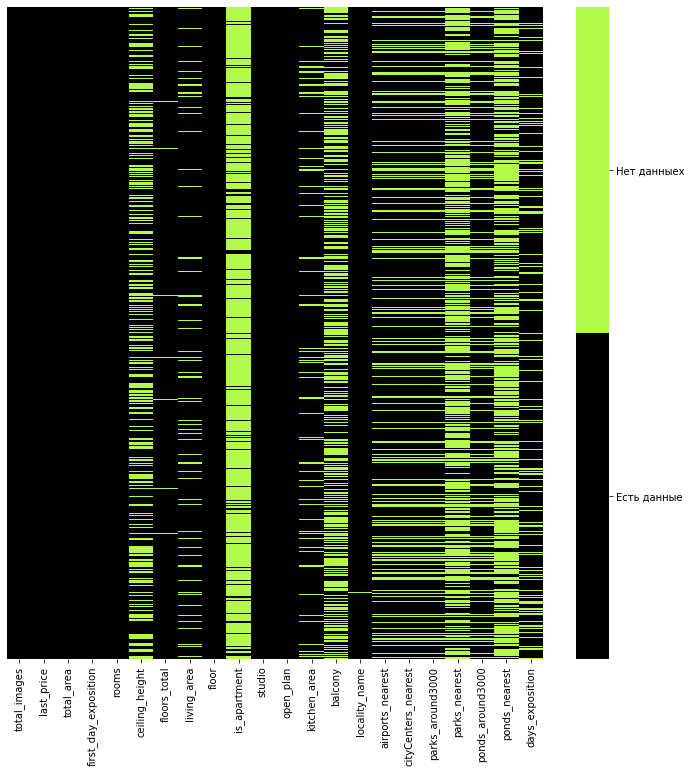

In [7]:
for col in real_estate.columns:
    pct_missing = np.mean(real_estate[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
colours = ['black', '#b4fa4b'] 
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(real_estate.isnull(), yticklabels=False, cmap=sns.color_palette(colours))

colorbar = ax.collections[0].colorbar
colorbar.set_ticks([1/4,3/4])
colorbar.set_ticklabels(['Есть данные','Нет данныех'])

**Вывод:   
Столбцы `airports_nearest` и `cityCenters_nearest` имеют по 23% пропусков. Не одни ли и те же это наблюдения? Взглянем на heatmap. Наши подозрения подтвердились – пропуски данных в этих 2-х столбцах относятся к одним и тем же наблюдениям: если данные не заполнены в `airports_nearest`, то их нет и в `cityCenters_nearest`. Возможно это наблюдения из небольших городов или поселков и не имело смысла указывать расстояние до центра города или ближайшего аэропорта**

**Вывод:  
В наших данных 23699 строки и 22 столбца. Но данные заполнены не во всех столбцах. Встречаются полупустые и практически незаполненные столбцы. Нужно узнать причину появления таких данных в столбцах и рассмотреть замену NaN на какие-либо другие значения, если такая замена возможна. В столбцах, где такая замена невозможна – оставим NaN**


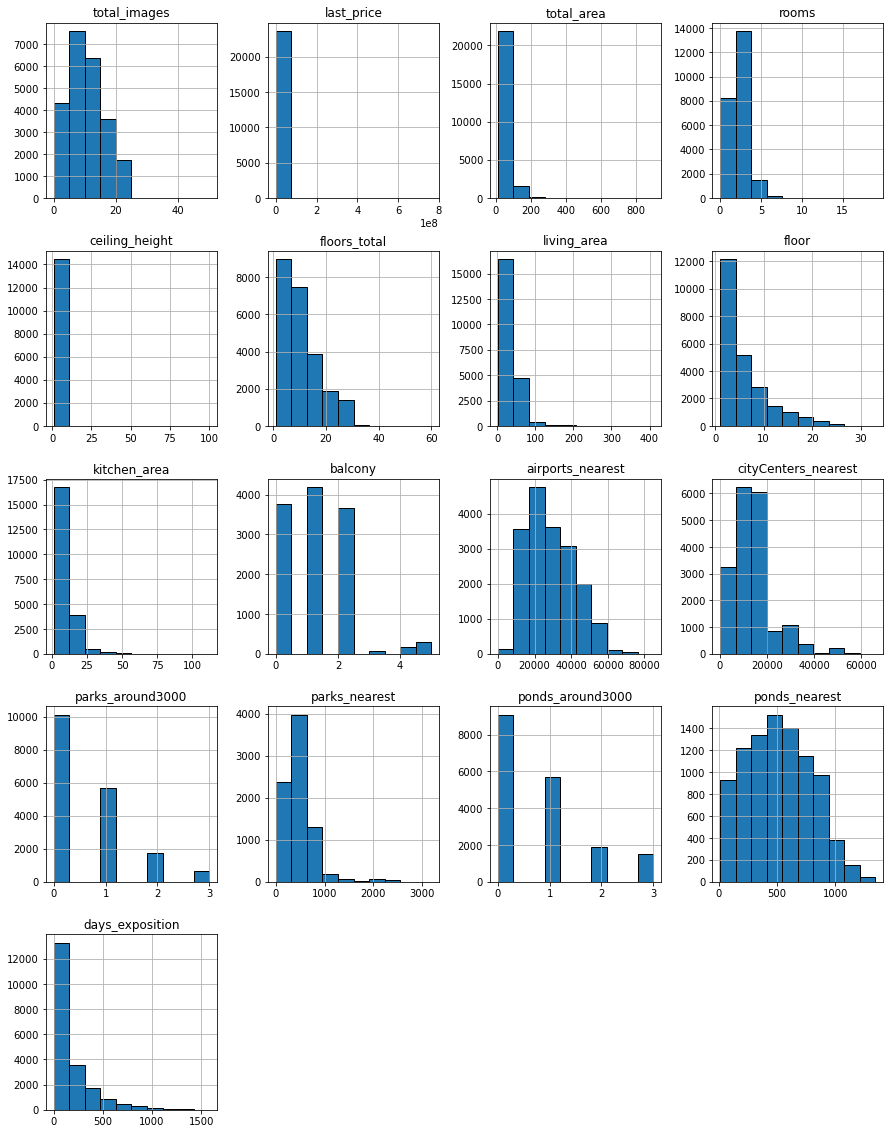

In [8]:
warnings.filterwarnings("ignore") # чтобы убрать все ворнинги 
real_estate.hist(figsize=(15, 20), ec='black'); # точка с запятой избавит график от вывода дополнительноый информац

### Предобработка данных

<a id='p2s1'></a>
**2.1 ceiling_height**

В столбце `['ceiling_height']` 38% пропущенных значений. Посмотрим на аномальные значения и сможем ли мы заменить пропуски.
Почитав о различных стандартах высоты потолков я решил считать аномальиями все данные, что выходят за пределы больше 7 и меньше 2 метров. 

In [9]:
real_estate.query('ceiling_height > 7 or ceiling_height < 2')['ceiling_height'].value_counts()

27.00     8
25.00     7
8.00      3
32.00     2
24.00     1
26.00     1
1.20      1
8.30      1
14.00     1
1.75      1
20.00     1
22.60     1
27.50     1
10.30     1
1.00      1
100.00    1
Name: ceiling_height, dtype: int64

В аномальных данных есть высоты 32, 27, 26, 25 и 20 метров. В разных домах распространены разные стандарты высоты потолков (например в Сталинках высоты потолков 3-3.5, а иногда даже 4.5 метра!). Возможно имеет место ошибка ввода данных на порядок. Испарвим эту ошибку, а остальные аномальные значения (больше 7 и меньше 2 метров) отбросим

In [10]:
def ceil_h(row):
    if row >= 20:
        row = row / 10
    return row

real_estate['ceiling_height'] = real_estate['ceiling_height'].apply(ceil_h)

In [11]:
real_estate.shape

(23699, 22)

In [12]:
real_estate = real_estate.drop(real_estate[(real_estate['ceiling_height'] > 7) | (real_estate['ceiling_height'] < 2)].index)

In [13]:
real_estate.query('ceiling_height > 7 or ceiling_height < 2')['ceiling_height'].value_counts()

Series([], Name: ceiling_height, dtype: int64)

**Посмотрим среднее, медиану и максимум.**

In [14]:
real_estate['ceiling_height'].mean()

2.7266234303849317

In [15]:
real_estate['ceiling_height'].median()

2.65

In [16]:
real_estate['ceiling_height'].max()

6.0

**Вполне можем заменить пропуски медианным значением**

In [17]:
real_estate.ceiling_height = real_estate.ceiling_height.fillna(real_estate.ceiling_height.median())

In [18]:
real_estate.ceiling_height.isna().sum()

0

<a id='p2s2'></a>
**2.2 floors_total**

**Проверим наличие аномалий в floors_total. Поменяем тип данных на int.**

In [19]:
real_estate.floors_total.value_counts()

5.0     5785
9.0     3761
16.0    1373
12.0    1361
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     552
18.0     505
24.0     469
8.0      390
2.0      382
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
Name: floors_total, dtype: int64

**Этаж на котором продается недвижимость не может быть больше этажности здания, в котором эта недвижимость продается. Но может быть всякое. Нужно проверить**

In [20]:
real_estate[real_estate['floor'] > real_estate['floors_total']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


**Таких значений нет, все в домике. Изменим тип**

In [21]:
real_estate.floors_total = real_estate.floors_total.fillna(0).astype(int)
real_estate.floors_total

0        16
1        11
2         5
3        14
4        14
         ..
23694     5
23695     5
23696     3
23697    17
23698     5
Name: floors_total, Length: 23689, dtype: int32

<a id='p2s3'></a>
**2.3 living_area**  
**Проверим наличие аномалий в столбце `['living_area']`. По логике сумма площадей кухни и жилой площади не может быть больше общей площади `['total_area']`. Сделаем проверку с погрешностью в 1 метр. (Я провел проверку с разными значениями и посчитал, что погрешность в 1 метр наиболее подходящая, т.к. погрешность например уже в 5 метров будет менее реалистичной и все-таки следует это считать уже ошибкой. Кроме того если не учитывать погрешность вообще никакую, то наблюдений с несовпадением по сумме жилой и кухонной площади с общей будет гораздо больше – 134)**

In [22]:
real_estate.query('(living_area + kitchen_area) >= (total_area + 1)').shape[0]

59

In [23]:
real_estate['false_area'] = real_estate.total_area + 1 - real_estate.living_area - real_estate.kitchen_area 

In [24]:
def false_area(square_m):
    if square_m < 0:
        return False
    else:
        return True

In [25]:
real_estate['false_area'] = real_estate['false_area'].apply(false_area)

**Если погрешность в 1 или даже 2 метра еще допустимы, то погрешности в 15 и 20 метров уже явные ошибки. Но таких наблюдений немного. Можем их отбросить.**

In [26]:
real_estate = real_estate.drop(real_estate[real_estate['false_area'] == False].index)
real_estate.query('false_area == False').shape[0]

0

<a id='p2s4'></a>
**2.4 is_apartment**  
**Столбец `['is_apartment']` имеет 88% пропусков, но этот столбец должен иметь булев тип данных (это сказано в описании проекта), а имеет тип `object`. Скорее всего владельцы не апартаментов просто оставили это поле незаполненным, т.к. являлись владельцами обычных квартир, что и стало причиной такого количества пропусков в данных.**

**Вывод:**  
Считаю что в этом столбце значения `NaN` можно заменить на `False`, а после этого изменить тип данных колонки.

In [27]:
real_estate.is_apartment.unique() # посмотрим на уникальные значения

array([nan, False, True], dtype=object)

**В столбце всего 3 вида значений: nan, False и True. Заменим nan на False и поменяем тип на bool. Проверим замену**

In [28]:
real_estate.is_apartment = real_estate.is_apartment.replace(np.nan, False).astype(bool)
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23634 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23634 non-null  int64  
 1   last_price            23634 non-null  float64
 2   total_area            23634 non-null  float64
 3   first_day_exposition  23634 non-null  object 
 4   rooms                 23634 non-null  int64  
 5   ceiling_height        23634 non-null  float64
 6   floors_total          23634 non-null  int32  
 7   living_area           21731 non-null  float64
 8   floor                 23634 non-null  int64  
 9   is_apartment          23634 non-null  bool   
 10  studio                23634 non-null  bool   
 11  open_plan             23634 non-null  bool   
 12  kitchen_area          21358 non-null  float64
 13  balcony               12140 non-null  float64
 14  locality_name         23585 non-null  object 
 15  airports_nearest   

<a id='p2s5'></a>
**2.5 balcony**   
**В столбце `['balcony']` половина значений пропущены. Скорее всего причиной появления `NaN` стало то, что при отсутствии балконов данные об их количестве просто не указывали, следовательно мы можем заменить `NaN` на 0. Так же было логично изменить тип из `float` на `int`, ведь у нас не может быть 1.5 балкона. И памяти будет занимать немного меньше**  

**Вывод:**      
Заменяем `Nan` нулями и меняем тип
</font>

In [29]:
real_estate.balcony = real_estate.balcony.replace(np.nan, 0).astype(int)
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23634 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23634 non-null  int64  
 1   last_price            23634 non-null  float64
 2   total_area            23634 non-null  float64
 3   first_day_exposition  23634 non-null  object 
 4   rooms                 23634 non-null  int64  
 5   ceiling_height        23634 non-null  float64
 6   floors_total          23634 non-null  int32  
 7   living_area           21731 non-null  float64
 8   floor                 23634 non-null  int64  
 9   is_apartment          23634 non-null  bool   
 10  studio                23634 non-null  bool   
 11  open_plan             23634 non-null  bool   
 12  kitchen_area          21358 non-null  float64
 13  balcony               23634 non-null  int32  
 14  locality_name         23585 non-null  object 
 15  airports_nearest   

<a id='p2s6'></a>
**2.6 kitchen_area**   
**`['living_area']`, `['kitchen_area']` хранят данные о площадях соответствующих помещений. Пропусков и там и там примерно одинаково. Возможно это одни и те же наблюдения. Можем построить heatmap по этим 2-м столбцам и проверить. Для этого транспонируем наш датафрейм и увеличим его масштаб по горизонтали, чтобы лучше вдиеть пересечения в пропусках** 

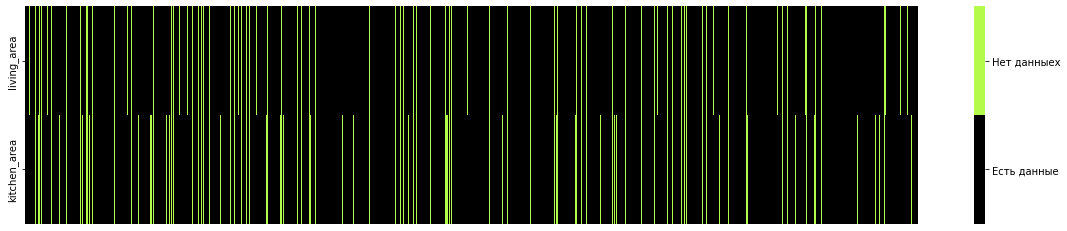

In [30]:
fig, ax = plt.subplots(figsize=(20,4))
sns.heatmap(real_estate[['living_area', 'kitchen_area']].isnull().T, xticklabels=False, cmap=sns.color_palette(colours))
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([1/4,3/4])
colorbar.set_ticklabels(['Есть данные','Нет данныех'])

**Вывод:**   
Наша гипотеза частично подтвредилась: иногда пропуски в данных относятся к одним и тем же наблюдениям, а иногда нет


**Проверим наличие аномалий в `['kitchen_area']`. Заменим пропуски на медиану**

In [31]:
real_estate['kitchen_area'].min()

1.3

In [32]:
real_estate.query('kitchen_area >= living_area').shape[0]

389

**В 389 наблюдениях площадь кухни больше либо равна жилой площади. Найдем отношение площади кухонь к общей площади, отношение жилой площади к общей и добавим эту информацию в новые столбцы. Далее возбмем медиану по этому столбцу и в соответствии с ней расчитаем площади кухонь для аномальных значений**

In [33]:
real_estate['kitchen_living_ratio'] = real_estate['kitchen_area'] / real_estate['total_area']
real_estate['living_total_ratio'] = real_estate['living_area'] / real_estate['total_area']

**Чем комнат больше, тем отношение меньше. Это стоит учесть при расчете площади кухни и заполнении пропусков**

In [34]:
for i in real_estate['rooms'].unique():
    real_estate.loc[(real_estate['living_area'] <= real_estate['kitchen_area'])&(real_estate['rooms']==i),'kitchen_area'] = real_estate[real_estate['rooms']==i]['kitchen_living_ratio'].median()*real_estate.loc[(real_estate['living_area'] <= real_estate['kitchen_area'])&(real_estate['rooms']==i),'total_area']
    real_estate.loc[(real_estate['living_area'] <= real_estate['kitchen_area'])&(real_estate['rooms']==i),'living_area'] = real_estate[real_estate['rooms']==i]['living_total_ratio'].median()*real_estate.loc[(real_estate['living_area'] <= real_estate['kitchen_area'])&(real_estate['rooms']==i),'total_area']
    real_estate.loc[(real_estate['living_area'] + real_estate['kitchen_area'] >= real_estate['total_area'])&(real_estate['rooms']==i),'kitchen_area'] = real_estate[real_estate['rooms']==i]['kitchen_living_ratio'].median()*real_estate.loc[(real_estate['living_area'] + real_estate['kitchen_area'] >= real_estate['total_area'])&(real_estate['rooms']==i),'total_area']

In [35]:
real_estate.query('kitchen_area > living_area').shape[0]

0

In [36]:
real_estate.query('living_area == kitchen_area').shape[0]

0

In [37]:
real_estate.query('kitchen_area >= living_area').shape[0]

0

<a id='p2s7'></a>
**2.7 parks_around3000 и ponds_around3000**  

**`['parks_around3000']` и  `['ponds_around3000']` хранит информацию о количестве парков и прудов (водоемов) в радиусе 3 тыс. метров. Вполне возможно `NaN` означает, что в этом радиусе нет прудов и парков в соответствующих столбцах и по этой причине эти ячейки не заполнялись. Также можно заметить, что в этих столбцах одинаковое количество пропусков. Заменим `Nan` в этих столбцах на 0 и преобразуем в тип данных int**

In [38]:
real_estate.parks_around3000 = real_estate.parks_around3000.replace(np.nan, 0).astype(int)
real_estate.ponds_around3000 = real_estate.ponds_around3000.replace(np.nan, 0).astype(int)

print('Количество пропусков в parks_around3000:', real_estate.parks_around3000.isnull().sum(), 'Тип данных', real_estate.parks_around3000.dtypes)
print('Количество пропусков в ponds_around3000:', real_estate.ponds_around3000.isnull().sum(), 'Тип данных', real_estate.ponds_around3000.dtypes)


Количество пропусков в parks_around3000: 0 Тип данных int32
Количество пропусков в ponds_around3000: 0 Тип данных int32


**Проверим есть ли случаи, где указано 0 парков, но при этом указана дистанция до ближайшего**

In [39]:
dist_park = real_estate['parks_nearest'].isnull()
real_estate.query('@dist_park == False and parks_around3000 == 0').index

Int64Index([1590, 10959, 19208, 19430], dtype='int64')

**Исправим**

In [40]:
real_estate.loc[real_estate.query('@dist_park == False and parks_around3000 == 0').index, 'parks_around3000'] = real_estate.query('@dist_park == False and parks_around3000 == 0')['parks_around3000'].replace(0, 1)
real_estate.query('@dist_park == False and parks_around3000 == 0').index

Int64Index([], dtype='int64')

**Проверим тоже самое и для прудов**

In [41]:
dist_pond = real_estate['ponds_nearest'].isnull()
real_estate.query('@dist_pond == False and ponds_around3000 == 0').index

Int64Index([], dtype='int64')

**Пропущенные значения в парках и прудах скорее всего означает их отсутствие. Заменим пропуски на 0 и изменим тип данных**

In [42]:
real_estate.parks_around3000 = real_estate.parks_around3000.fillna(0)
real_estate.ponds_around3000 = real_estate.ponds_around3000.fillna(0) 
real_estate.parks_around3000 = real_estate.parks_around3000.astype(int)
real_estate.ponds_around3000 = real_estate.ponds_around3000.astype(int)
print(real_estate.parks_around3000.isna().sum())
print(real_estate.ponds_around3000.isna().sum())

0
0


<a id='p2s8'></a>
**2.8 parks_nearest и ponds_nearest**  
**Не будем заполнять пропуски, т.к. расстояние до парков и прудов трудно предсказать на основе имеющихся даных**

<a id='p2s9'></a>
**2.9 first_day_exposition, days_exposition**   
**Столбец `['first_day_exposition']` хранит данные о дате публикации объявления. Соответственно тип даннхы должен быть `datetime`, а не `object`. Дата записана в формате '%Y%m%dT%H%M%S'. Время везде указано как `00:00:00`. Эта информация нам не нужна.**

In [43]:
real_estate['first_day_exposition'] = pd.to_datetime(real_estate['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

**Проверим правильность исполения кода. Выведем первые 10 строк кода**

In [44]:
real_estate.first_day_exposition.head(10)

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
5   2018-09-10
6   2017-11-02
7   2019-04-18
8   2018-05-23
9   2017-02-26
Name: first_day_exposition, dtype: datetime64[ns]

**Посмотрим на пропуски в данных**

In [45]:
len(real_estate.query('days_exposition.isnull() == True'))

3174

**Возможно пропуски связаны с отсутствием информации о продаже – квартиру либо еще не продали, либо продали, но данные еще не актуализировали. Удалим строки/поменяем тип на int**

<a id='p2s10'></a>
**2.10 locality_name**  
**Пропуски в данном столбце мы заменить не можем никакими значениями**

<a id='p2s11'></a>
**2.11 airports_nearest, cityCenters_nearest**  

**Т.к. мы ничего не знаем о расположении объектов (нет геометок) пропуски в этих столбцах мы заполнить не сможем.  
Посмотрим сколько осталось пропусков в наших данных теперь**

<a id='p2s12'></a>
**2.12 last_price**  

In [46]:
real_estate.last_price.describe().round()

count        23634.0
mean       6545301.0
std       10900755.0
min          12190.0
25%        3405250.0
50%        4650000.0
75%        6800000.0
max      763000000.0
Name: last_price, dtype: float64

**Максимальная цена в 763 миллиона уже совсем запредельная. Построим боксплот и посмотрим какие еще аномальные значения у нас имеются**

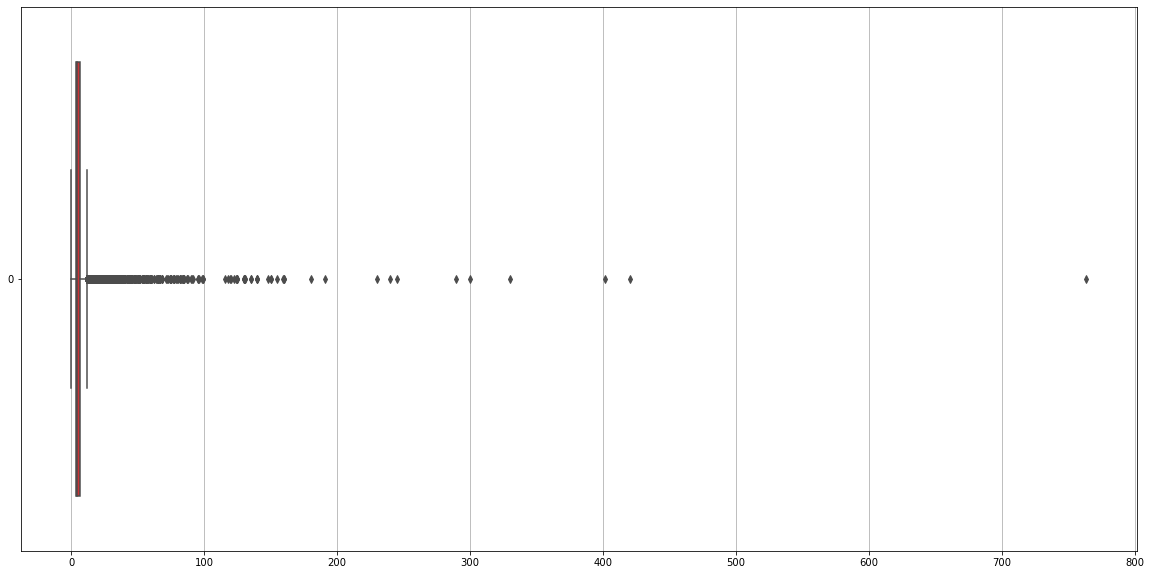

In [47]:
temp_data = real_estate.last_price / 1000000 # делим на миллион, чтобы на оси x все нормально отображалось
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10
ax = sns.boxplot(data=temp_data, orient="h", palette="Set1")
ax.xaxis.grid(True)

**На промежутке от 100 до 200 миллионов еще есть некоторая плотность значений, а вот после 200 миллионов встречаются уже единичные случаи, которые достаточно удалены по цене друг от друга. Посмотрим сколько у нас имеется такиз значений:**

In [48]:
real_estate.query('last_price > 200000000')['last_price'].value_counts()

330000000.0    1
230000000.0    1
763000000.0    1
240000000.0    1
401300000.0    1
300000000.0    1
245000000.0    1
420000000.0    1
289238400.0    1
Name: last_price, dtype: int64

**Вывод:**    
6 значений. Дропаем

In [49]:
real_estate = real_estate.query('last_price < 200000000')

**Также у нас есть объекты, которые стоят по 12 тыс рублей. Нужно также не забыть и про подозрительно дешевые квартиры.**

In [50]:
real_estate.query('last_price < 1000000')['last_price'].value_counts()

850000.0    26
950000.0    24
900000.0    19
650000.0    14
750000.0    12
600000.0    11
990000.0    10
700000.0    10
800000.0     9
550000.0     6
720000.0     5
500000.0     4
770000.0     4
630000.0     4
450000.0     4
790000.0     4
660000.0     3
780000.0     3
470000.0     3
730000.0     3
970000.0     3
560000.0     3
980000.0     3
490000.0     2
820000.0     2
920000.0     2
860000.0     2
690000.0     2
430000.0     2
890000.0     1
520000.0     1
965780.0     1
870000.0     1
680000.0     1
999000.0     1
999999.0     1
740000.0     1
440000.0     1
480000.0     1
590000.0     1
565000.0     1
777000.0     1
995000.0     1
530000.0     1
869000.0     1
880000.0     1
710000.0     1
580000.0     1
760000.0     1
910000.0     1
12190.0      1
620000.0     1
585000.0     1
945750.0     1
799000.0     1
Name: last_price, dtype: int64

**Из всех цен только одно выделяется на фоне всех других – объект, стоимостью 12190. Посмотрим на него повнимательнее.**

In [51]:
real_estate.query('last_price == 12190')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,false_area,kitchen_living_ratio,living_total_ratio
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,...,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0,True,0.37156,0.293578


**Не совсем понятный объект. Общая площадь 109 квадратов, 32 квадрата жилой площади и 17 кухонной. Возможно при вводе цены ошиблись на пару нулей. Исправим.**

In [52]:
real_estate.loc[real_estate['last_price'] == 12190, 'last_price'] = real_estate.query('last_price == 12190')['last_price'] * 100

<a id='p2s13'></a>
**2.13 rooms**  

In [53]:
real_estate.rooms.value_counts()

1     8015
2     7915
3     5804
4     1180
5      325
0      197
6      102
7       57
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
Name: rooms, dtype: int64

**Объекты с 9 и 8 комнатами хоть и кажутся маловероятны лично мне, но все же имеют еще заметное количество наблюдений в данных. Остальные случаи с большим количеством комнат уже более редкие. Буду считать их аномалиями.**

In [54]:
real_estate = real_estate.query('rooms < 10')

In [55]:
real_estate.rooms.value_counts()

1    8015
2    7915
3    5804
4    1180
5     325
0     197
6     102
7      57
8      12
9       8
Name: rooms, dtype: int64

<a id='p2s14'></a>
**2.14 total_area**

In [56]:
real_estate.total_area.describe().round()

count    23615.0
mean        60.0
std         34.0
min         12.0
25%         40.0
50%         52.0
75%         70.0
max        631.0
Name: total_area, dtype: float64

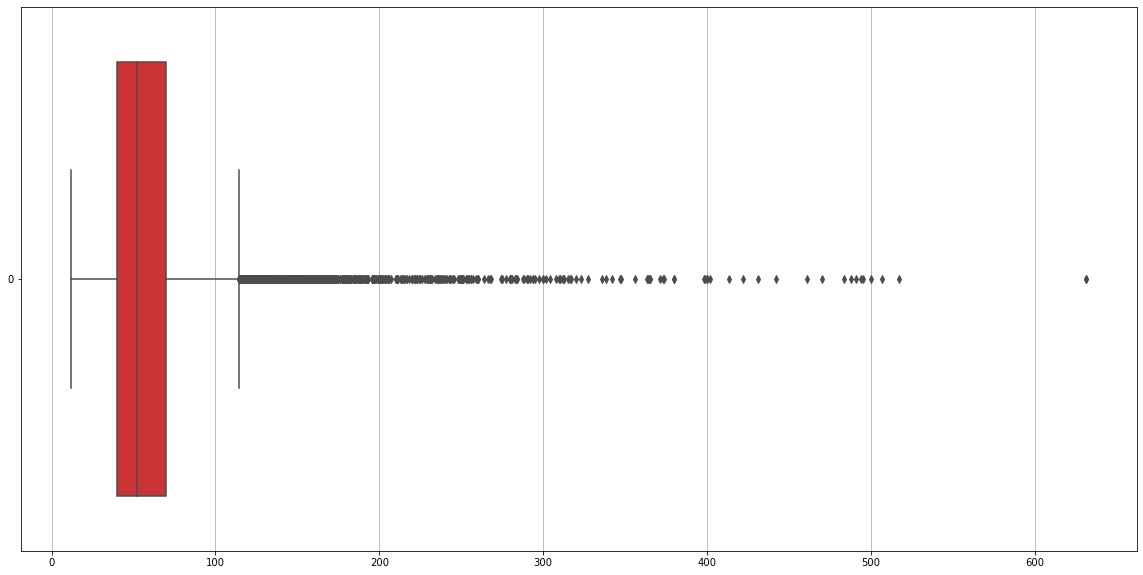

In [57]:
temp_data = real_estate.total_area 

ax = sns.boxplot(data=temp_data, orient="h", palette="Set1")
from matplotlib import rcParams
ax.xaxis.grid(True)
rcParams['figure.figsize'] = 20,10

**Рассмотрим более внимательно данные об объектах, чья площадь более 400 кв. метров.**

In [58]:
real_estate.query('total_area > 400')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,false_area,kitchen_living_ratio,living_total_ratio
660,3,49950000.0,483.90,2017-10-04,7,3.20,6,312.5,4,False,False,False,...,0,Санкт-Петербург,23079.0,945.0,3,461.0,3,22.0,391.0,True,0.054557,0.645795
3117,19,140000000.0,631.00,2019-03-30,7,2.65,5,NaN,5,False,False,False,...,0,Санкт-Петербург,25707.0,4972.0,0,NaN,2,210.0,NaN,True,0.095087,NaN
3676,12,28789000.0,441.98,2019-01-23,4,2.65,6,NaN,6,False,False,False,...,0,Санкт-Петербург,20552.0,5181.0,0,NaN,0,NaN,NaN,True,0.079302,NaN
4237,1,50000000.0,517.00,2017-10-14,7,2.65,4,332.0,3,False,False,False,...,0,Санкт-Петербург,22835.0,1847.0,2,477.0,2,540.0,NaN,True,0.042553,0.642166
6221,8,34000000.0,470.30,2018-01-14,4,2.65,3,248.7,3,False,False,False,...,0,Санкт-Петербург,43756.0,15459.0,1,852.0,3,122.0,179.0,True,0.085052,0.528811
6621,20,99000000.0,488.00,2017-04-09,5,2.95,20,216.0,17,False,False,False,...,0,Санкт-Петербург,27641.0,4598.0,1,646.0,1,368.0,351.0,True,0.102459,0.442623
8018,20,84000000.0,507.00,2015-12-17,5,4.45,7,301.5,7,True,False,False,...,1,Санкт-Петербург,NaN,5735.0,2,110.0,0,NaN,1078.0,True,0.089744,0.594675
9826,1,43185328.0,494.10,2017-05-12,1,2.85,12,NaN,3,False,False,False,...,0,Санкт-Петербург,28529.0,6832.0,1,592.0,0,NaN,5.0,True,NaN,NaN
12401,20,91500000.0,495.00,2017-06-19,7,4.65,7,347.5,7,False,False,False,...,0,Санкт-Петербург,NaN,5735.0,2,110.0,0,NaN,14.0,True,0.050505,0.702020
12859,20,140000000.0,631.20,2019-04-09,7,3.90,4,322.3,4,False,False,False,...,1,Санкт-Петербург,25707.0,4972.0,0,NaN,2,210.0,NaN,True,0.030894,0.510615


**Данные выглядят вполне правдоподобно. Цены на эту недвижимость высока, жилая площадь также высока. Посмотрим в каких местах расположена эта недвижимость и насколько она отдалена от центра**

In [59]:
real_estate.query('total_area > 400')[['locality_name', 'cityCenters_nearest']]

,locality_name,cityCenters_nearest
660,Санкт-Петербург,945.0
3117,Санкт-Петербург,4972.0
3676,Санкт-Петербург,5181.0
4237,Санкт-Петербург,1847.0
6221,Санкт-Петербург,15459.0
6621,Санкт-Петербург,4598.0
8018,Санкт-Петербург,5735.0
9826,Санкт-Петербург,6832.0
12401,Санкт-Петербург,5735.0
12859,Санкт-Петербург,4972.0


**Эта недвижимость расположена в центре питера, что вполне оправдывает такую высокуюу стоимость.**  

**Вывод:**    
Оставляю данные

**Посмотрим на пропуски в данных теперь**

total_images - 0%
last_price - 0%
total_area - 0%
first_day_exposition - 0%
rooms - 0%
ceiling_height - 0%
floors_total - 0%
living_area - 8%
floor - 0%
is_apartment - 0%
studio - 0%
open_plan - 0%
kitchen_area - 10%
balcony - 0%
locality_name - 0%
airports_nearest - 23%
cityCenters_nearest - 23%
parks_around3000 - 0%
parks_nearest - 66%
ponds_around3000 - 0%
ponds_nearest - 62%
days_exposition - 13%
false_area - 0%
kitchen_living_ratio - 10%
living_total_ratio - 8%


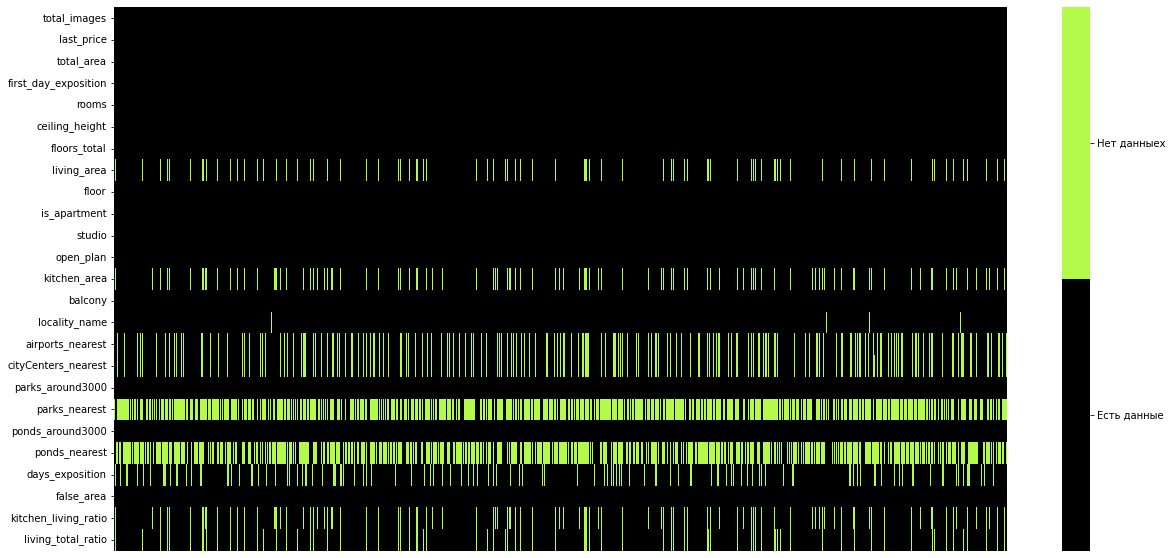

In [60]:
for col in real_estate.columns:
    pct_missing = np.mean(real_estate[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
colours = ['black', '#b4fa4b'] 
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(real_estate.isnull().T, xticklabels=False, cmap=sns.color_palette(colours))

colorbar = ax.collections[0].colorbar
colorbar.set_ticks([1/4,3/4])
colorbar.set_ticklabels(['Есть данные','Нет данныех'])

**Устраним неявные дубликаты в названиях населенных пунктов в столбце `['locality_name']`. Для начала выведем все уникальные значения этого столбца**

In [61]:
real_estate.locality_name.unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

**Видим, что у нас много названий мест, которые начинаются с "посёлок городского типа", "поселок городского типа", "городской поселок" и "поселок". За такими названиями могут скрываться дубликаты. Заменим это на пустоту и посмотрим на оставшиеся уникальные значения. 
Я создал список из значений, которые хочу убрать из названий методом replace. Далее циклом прохожу по списку уникальных локаций, и уже вложенным списком прохожу по каждой локации, убирая все ненужное.**

In [62]:
replace_list = ['поселок городского типа ', 'посёлок городского типа ', 'городской поселок ', \
                'городской посёлок ', 'посёлок ', 'поселок ', 'деревня ', 'село ']
real_estate['locality_unduplicated'] = real_estate['locality_name']
for replace in replace_list:
    real_estate['locality_unduplicated'] = real_estate['locality_unduplicated'].str.replace(replace, '')
real_estate.locality_unduplicated.sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Виллози',
       'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара', 'Ильичёв

**Срваним количество уникальных значений локаций до и после обработки неявных дубликатов.**

In [63]:
print('до обработки дубликатов:', len(real_estate.locality_name.unique()))
print('после обработки дубликатов:', len(real_estate.locality_unduplicated.unique()))

до обработки дубликатов: 365
после обработки дубликатов: 312


In [64]:
real_estate[['locality_name', 'locality_unduplicated']]

,locality_name,locality_unduplicated
0,Санкт-Петербург,Санкт-Петербург
1,посёлок Шушары,Шушары
2,Санкт-Петербург,Санкт-Петербург
3,Санкт-Петербург,Санкт-Петербург
4,Санкт-Петербург,Санкт-Петербург
...,...,...
23694,Санкт-Петербург,Санкт-Петербург
23695,Тосно,Тосно
23696,село Рождествено,Рождествено
23697,Санкт-Петербург,Санкт-Петербург


**Проверим долю потери данных**

In [65]:
real_estate.shape[0] / initial_real_estate.shape[0]

0.9964555466475379

### Посчитайте и добавьте в таблицу новые столбцы

<a id='p3s1'></a>
**3.1 Стоимость кв. метра**  
**Посчитаем стоимость кв. метра**

In [66]:
real_estate['sq_meter_price'] = (real_estate.last_price / real_estate.total_area).astype('int')

**Добавим столбцы с днем, месяцем и годом публикации объявления.**

In [67]:
real_estate['weekday'] = real_estate.first_day_exposition.dt.weekday
real_estate['month'] = real_estate.first_day_exposition.dt.month
real_estate['year'] = real_estate.first_day_exposition.dt.year
real_estate[['first_day_exposition', 'year', 'month', 'weekday']] # проверка

,first_day_exposition,year,month,weekday
0,2019-03-07,2019,3,3
1,2018-12-04,2018,12,1
2,2015-08-20,2015,8,3
3,2015-07-24,2015,7,4
4,2018-06-19,2018,6,1
...,...,...,...,...
23694,2017-03-21,2017,3,1
23695,2018-01-15,2018,1,0
23696,2018-02-11,2018,2,6
23697,2017-03-28,2017,3,1


<a id='p3s2'></a>
**3.2 Категоризация этажей**  
**Категоризуем этажность на 3 категории: первый, последний и другой**

In [68]:
real_estate.loc[real_estate['floor'] == 1, 'categorised_floor'] = 'Первый'
real_estate.loc[(real_estate['floors_total'] == real_estate['floor']) & (real_estate['floor'] != 1), 'categorised_floor'] = 'Последний'
real_estate.loc[(real_estate['floors_total'] > real_estate['floor']) & (real_estate['floor'] > 1), 'categorised_floor'] = 'Другой'

In [69]:
real_estate[['floor', 'floors_total', 'categorised_floor']].sample(15)

,floor,floors_total,categorised_floor
13944,3,9,Другой
8429,8,9,Другой
15141,3,5,Другой
4581,1,10,Первый
8631,3,16,Другой
11104,4,5,Другой
20291,7,25,Другой
12135,10,10,Последний
20290,2,5,Другой
977,7,16,Другой


<a id='p3s3'></a>
**3.3 Расстояние до центра города в км**  

In [70]:
real_estate['to_center_km'] = real_estate.cityCenters_nearest // 1000
real_estate['to_center_km']

0        16.0
1        18.0
2        13.0
3         6.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: to_center_km, Length: 23615, dtype: float64

**Вывод:**      
Добавили следующие столбцы: цена за кв. метр, категория этажа, расстояние до центра в км., день недели, месяц и год публикации объявления.  

### Проведите исследовательский анализ данных

<a id='p4s1'></a>
**4.1 Изучение и описание параметров** 

<a id='p4s1.1'></a>
**4.1.1 total_area** 

(array([16436., 16617., 16801., 16983., 17167., 17348., 17532., 17713.,
        17897., 18078.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

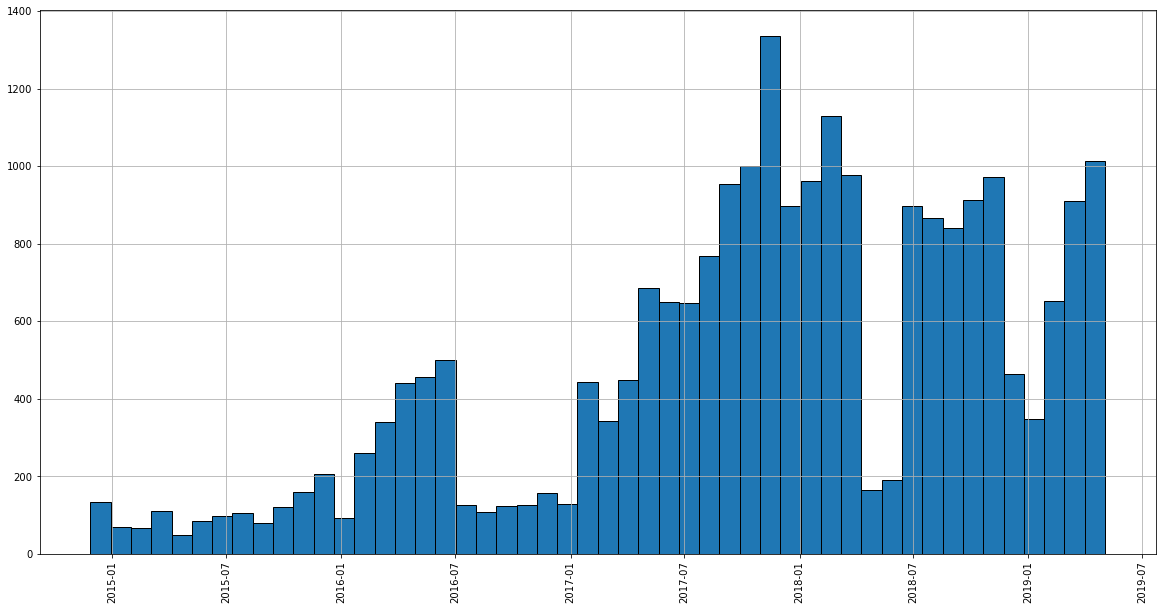

In [71]:
real_estate['first_day_exposition'].hist(bins=50, ec='black')
plt.xticks(rotation='vertical')

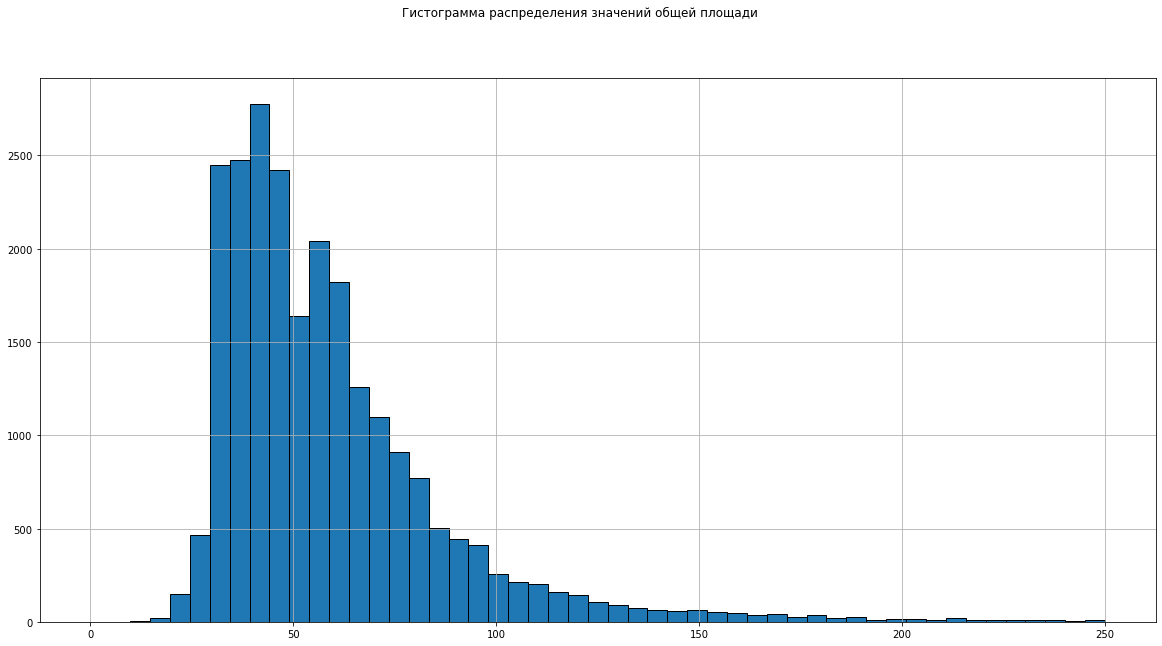

In [72]:
real_estate['total_area'].hist(bins=51, range=(0,250), ec='black')

plt.suptitle('Гистограмма распределения значений общей площади')
plt.show()

In [73]:
real_estate['total_area'].describe()

count    23615.000000
mean        60.140409
std         34.276408
min         12.000000
25%         40.000000
50%         52.000000
75%         69.775000
max        631.200000
Name: total_area, dtype: float64

In [74]:
real_estate['total_area'].mode()

0    45.0
Name: total_area, dtype: float64

**Посчитав моду для столбца с общей площадью, можем сказать, что объекты с общей площадью в 45 метров встречаются в наших данных наиболее часто.**

<a id='p4s1.2'></a>
**4.1.2 living_area**

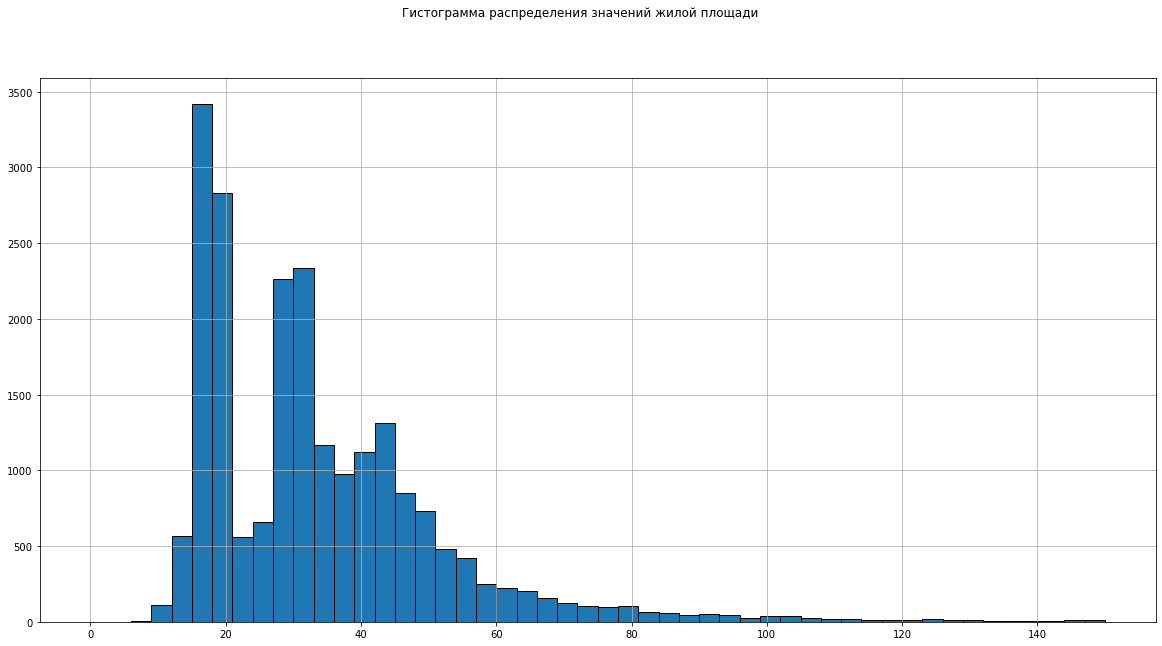

In [75]:
real_estate['living_area'].hist(bins=50, range=(0,150), ec='black')
plt.suptitle('Гистограмма распределения значений жилой площади')
plt.show()

In [76]:
real_estate['living_area'].describe()

count    21713.000000
mean        34.328633
std         21.336210
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        347.500000
Name: living_area, dtype: float64

In [77]:
real_estate['living_area'].mode()

0    18.0
Name: living_area, dtype: float64

<a id='p4s1.3'></a>
**4.1.3 kitchen_area**

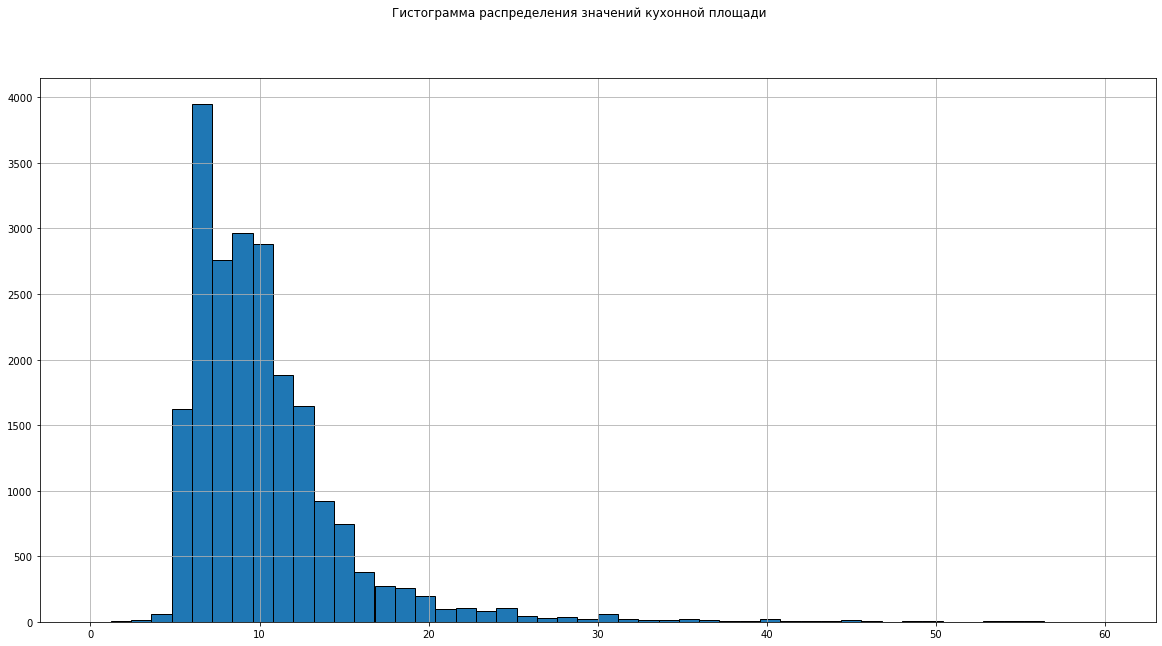

In [78]:
real_estate['kitchen_area'].hist(bins=50, range=(0,60), ec='black')
plt.suptitle('Гистограмма распределения значений кухонной площади')
plt.show()

In [79]:
real_estate['kitchen_area'].describe()

count    21340.000000
mean        10.275671
std          5.116079
min          1.300000
25%          7.000000
50%          9.000000
75%         11.780000
max        100.700000
Name: kitchen_area, dtype: float64

In [80]:
real_estate['kitchen_area'].mode()

0    6.0
Name: kitchen_area, dtype: float64

<a id='p4s1.4'></a>
**4.1.4 last_price**

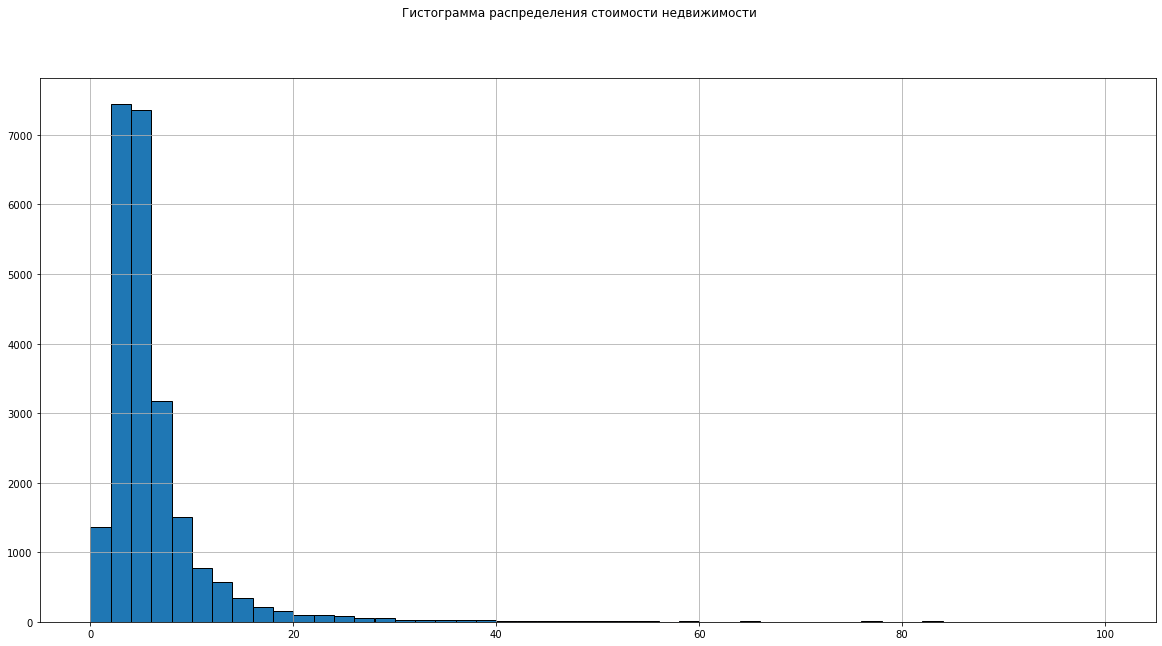

In [81]:
temp = real_estate['last_price'] / 1000000
temp.hist(bins=50, range=(0, 100), ec='black')
real_estate['last_price'].hist(bins=50, range=(0,60), ec='black')
plt.suptitle('Гистограмма распределения стоимости недвижимости')
plt.show()

In [82]:
real_estate['last_price'].describe().round()

count        23615.0
mean       6401266.0
std        7887513.0
min         430000.0
25%        3400000.0
50%        4646000.0
75%        6790000.0
max      190870000.0
Name: last_price, dtype: float64

In [83]:
real_estate['last_price'].mode()

0    4500000.0
Name: last_price, dtype: float64

<a id='p4s1.5'></a>
**4.1.5 rooms**

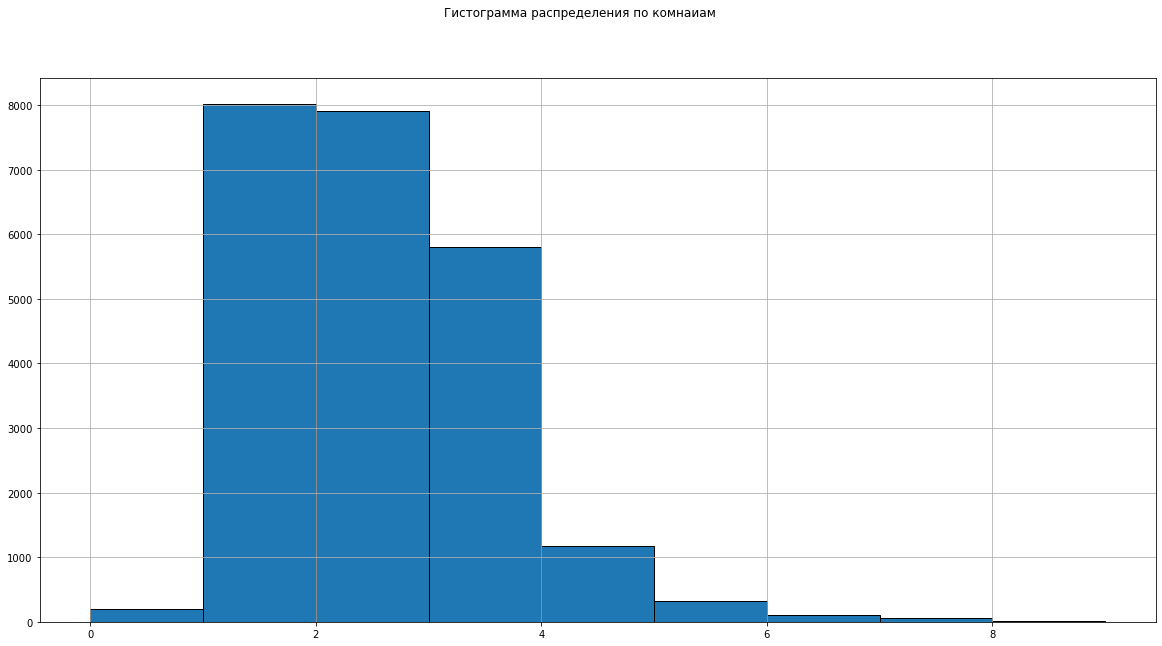

In [84]:
real_estate['rooms'].hist(bins = real_estate['rooms'].max(), ec='black')
plt.suptitle('Гистограмма распределения по комнаиам')
plt.show()

In [85]:
real_estate['rooms'].describe().round()

count    23615.0
mean         2.0
std          1.0
min          0.0
25%          1.0
50%          2.0
75%          3.0
max          9.0
Name: rooms, dtype: float64

In [86]:
real_estate['rooms'].mode()

0    1
Name: rooms, dtype: int64

**Квартиры с нулем комнат возможно являются студиями**

<a id='p4s1.6'></a>
**4.1.6 ceiling_height**

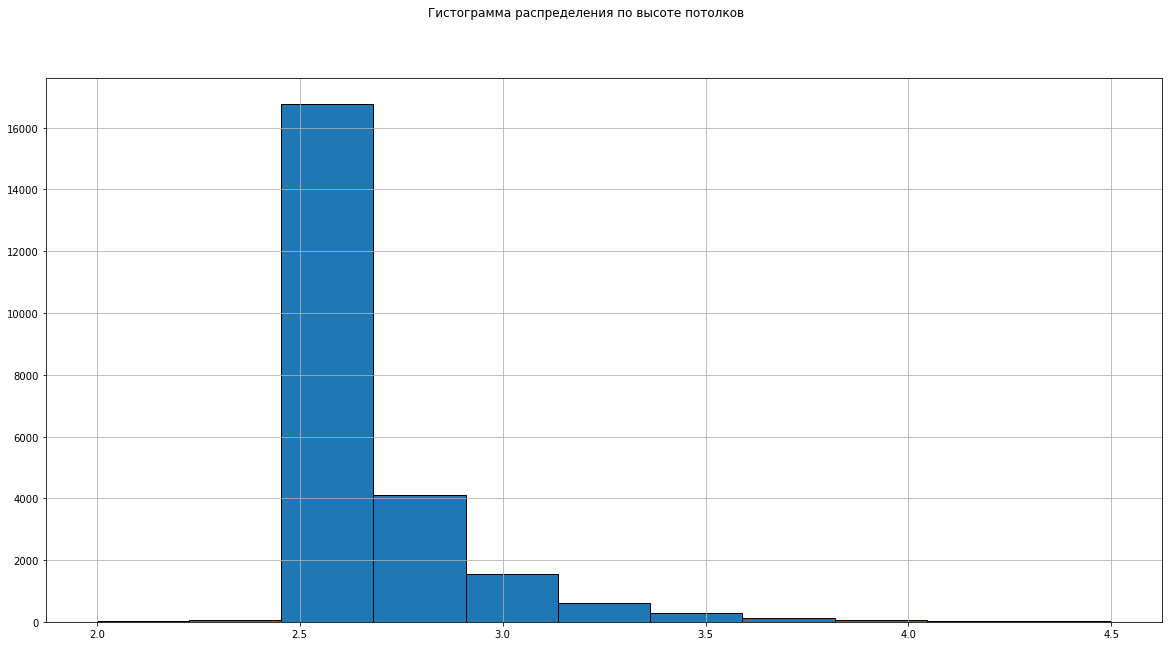

In [87]:
real_estate['ceiling_height'].hist(bins=11, range=(2,4.5), ec='black')
plt.suptitle('Гистограмма распределения по высоте потолков')
plt.show()

In [88]:
real_estate['ceiling_height'].describe().round()

count    23615.0
mean         3.0
std          0.0
min          2.0
25%          3.0
50%          3.0
75%          3.0
max          6.0
Name: ceiling_height, dtype: float64

In [89]:
real_estate['ceiling_height'].mode()

0    2.65
Name: ceiling_height, dtype: float64

<a id='p4s1.7'></a>
**4.1.7 floor**

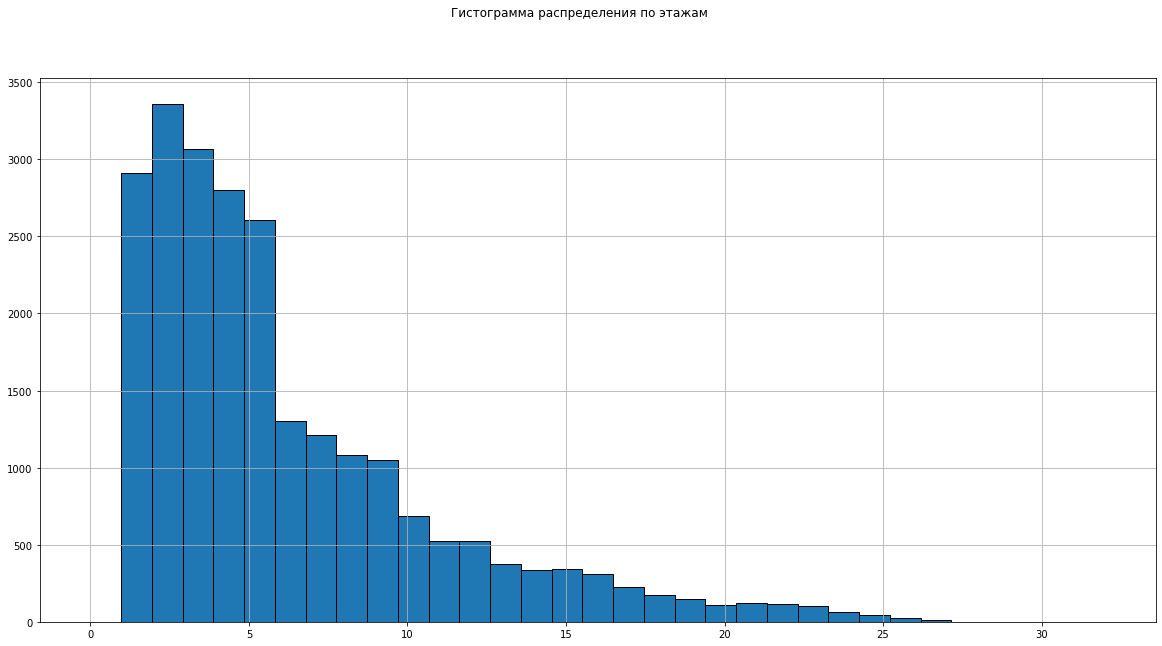

In [90]:
real_estate['floor'].hist(bins = real_estate['floor'].max(), range=(0,32), ec='black')
plt.suptitle('Гистограмма распределения по этажам')
plt.show()

In [91]:
real_estate['floor'].describe().round()

count    23615.0
mean         6.0
std          5.0
min          1.0
25%          2.0
50%          4.0
75%          8.0
max         33.0
Name: floor, dtype: float64

In [92]:
real_estate['floor'].mode()

0    2
Name: floor, dtype: int64

<a id='p4s1.8'></a>
**4.1.8 categorised_floor**

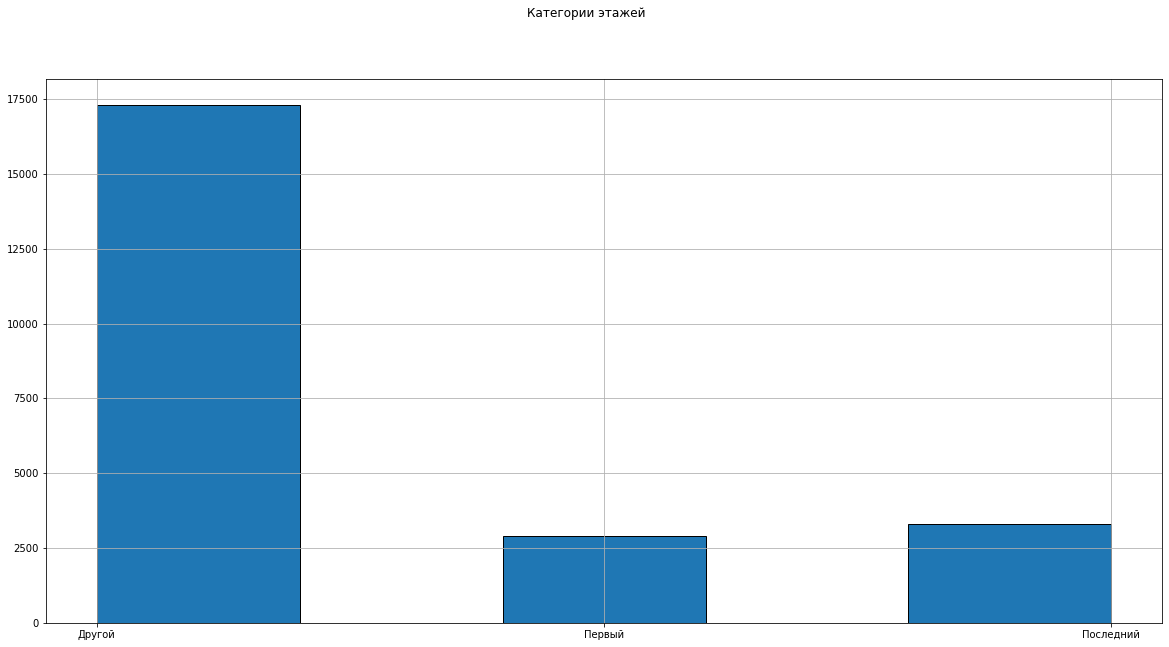

In [93]:
real_estate['categorised_floor'].hist(bins=5, range=(0,2), ec='black')
plt.suptitle('Категории этажей')
plt.show()

In [94]:
real_estate['categorised_floor'].mode()

0    Другой
Name: categorised_floor, dtype: object

<a id='p4s1.9'></a>
**4.1.9 total_floors**

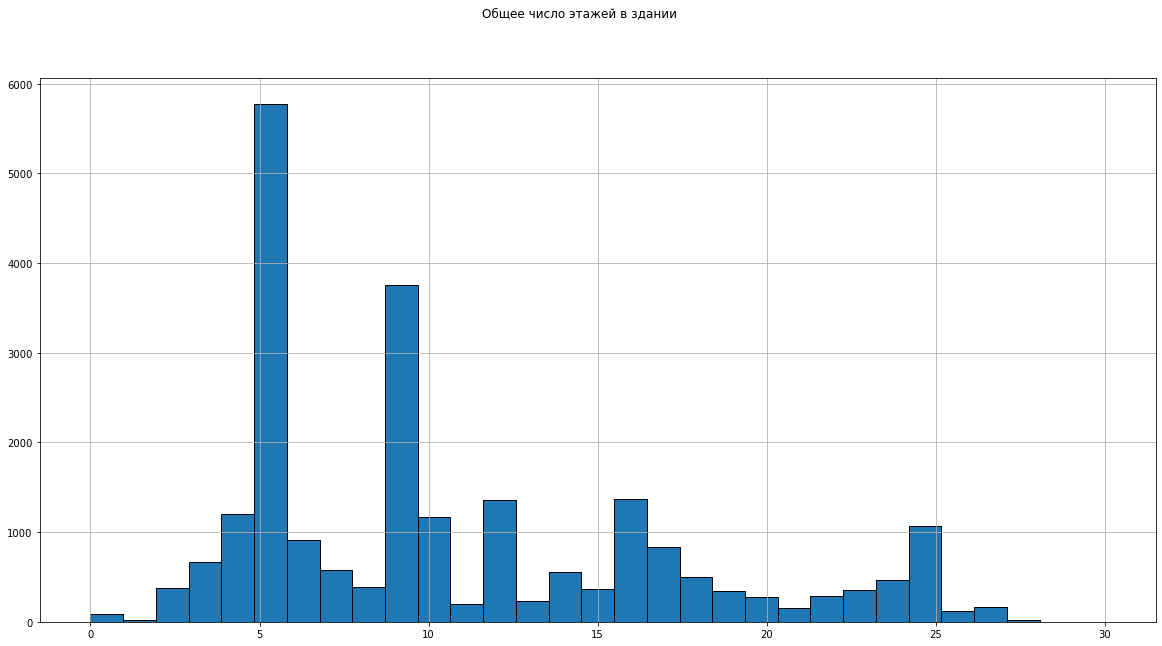

In [95]:
real_estate['floors_total'].hist(bins=31, range=(0,30), ec='black')
plt.suptitle('Общее число этажей в здании')
plt.show()

In [96]:
real_estate['floors_total'].describe().round()

count    23615.0
mean        11.0
std          7.0
min          0.0
25%          5.0
50%          9.0
75%         16.0
max         60.0
Name: floors_total, dtype: float64

In [97]:
real_estate['floors_total'].mode()

0    5
Name: floors_total, dtype: int32

<a id='p4s1.10'></a>
**4.1.10 cityCenters_nearest**

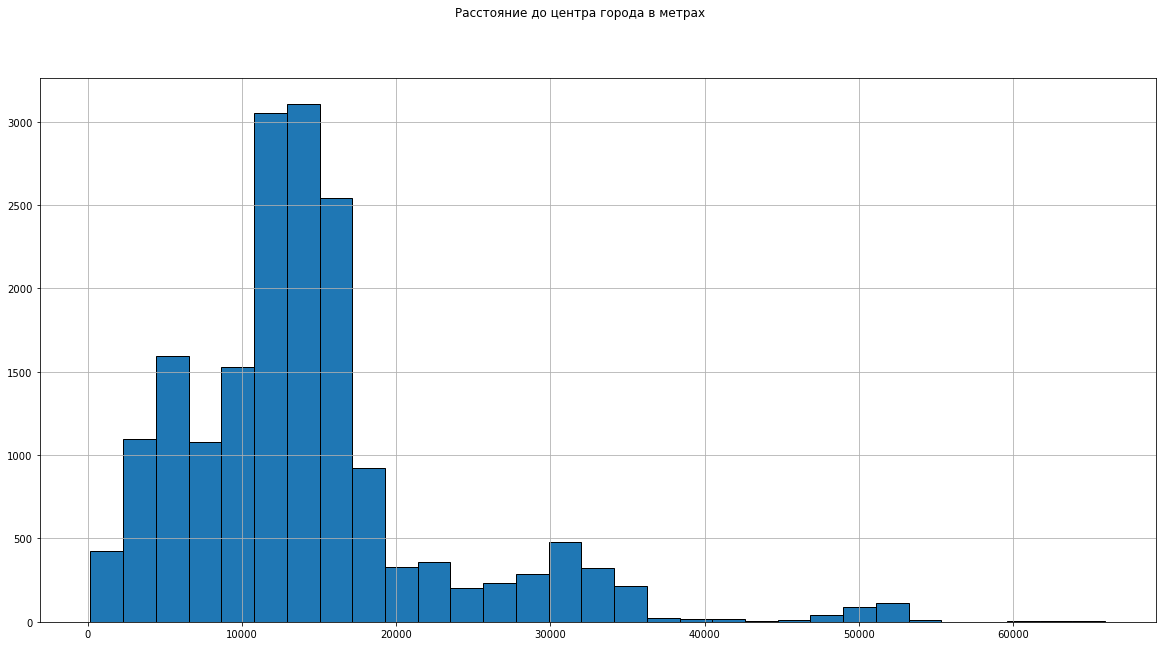

In [98]:
real_estate['cityCenters_nearest'].hist(bins=31, ec='black')
plt.suptitle('Расстояние до центра города в метрах')
plt.show()

In [99]:
real_estate['cityCenters_nearest'].describe().round()

count    18114.0
mean     14201.0
std       8612.0
min        181.0
25%       9241.0
50%      13105.0
75%      16296.0
max      65968.0
Name: cityCenters_nearest, dtype: float64

<a id='p4s1.11'></a>
**4.1.11 airports_nearest**

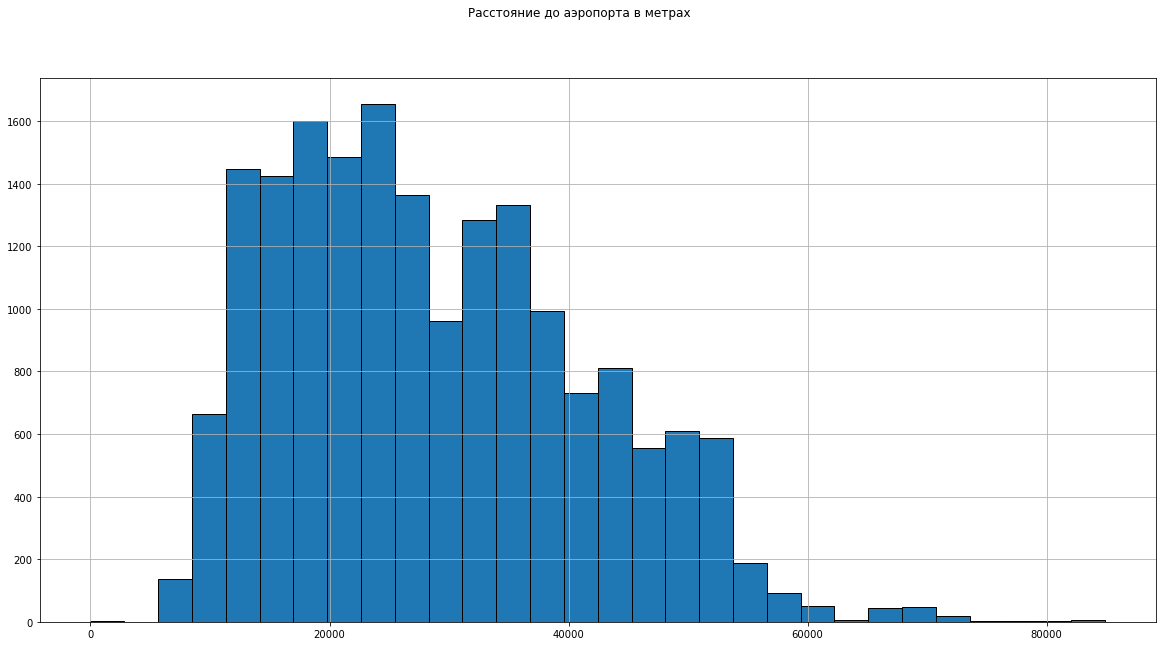

In [100]:
real_estate['airports_nearest'].hist(bins=30, ec='black')
plt.suptitle('Расстояние до аэропорта в метрах')
plt.show()

In [101]:
real_estate['airports_nearest'].describe().round()

count    18091.0
mean     28799.0
std      12636.0
min          0.0
25%      18584.0
50%      26729.0
75%      37288.0
max      84869.0
Name: airports_nearest, dtype: float64

<a id='p4s1.12'></a>
**4.1.12 parks_nearest**

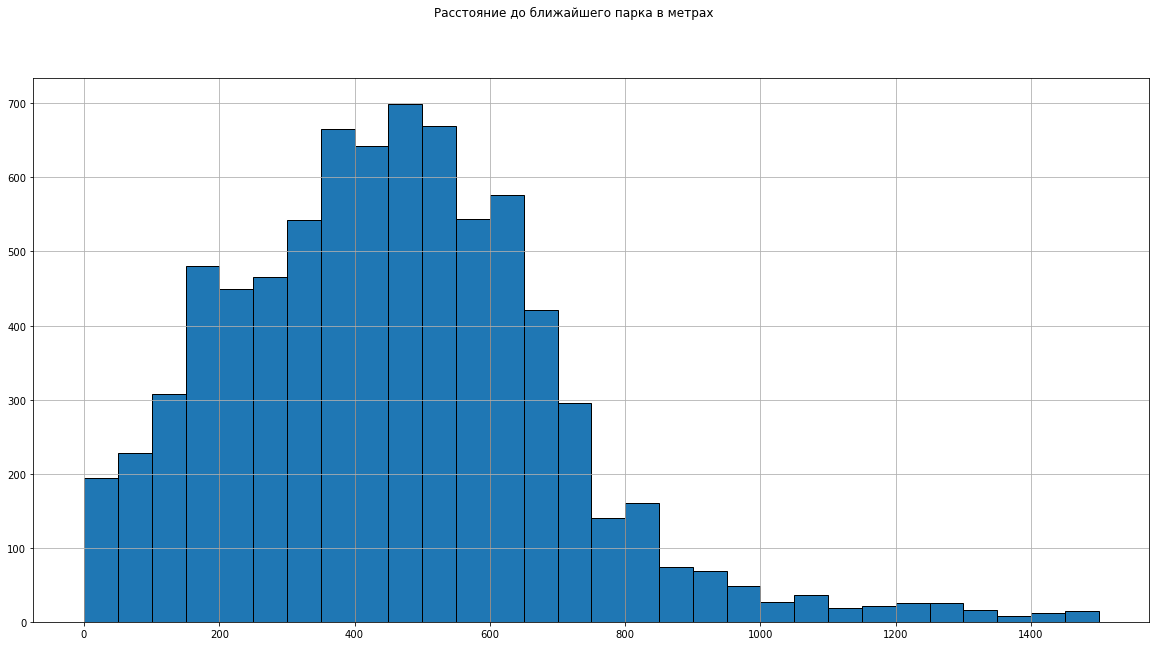

In [102]:
real_estate['parks_nearest'].hist(bins=30, range=(0, 1500), ec='black')
plt.suptitle('Расстояние до ближайшего парка в метрах')
plt.show()

In [103]:
real_estate['parks_nearest'].describe().round()

count    8049.0
mean      491.0
std       343.0
min         1.0
25%       288.0
50%       455.0
75%       612.0
max      3190.0
Name: parks_nearest, dtype: float64

<a id='p4s1.13'></a>
**4.1.13 weekday**

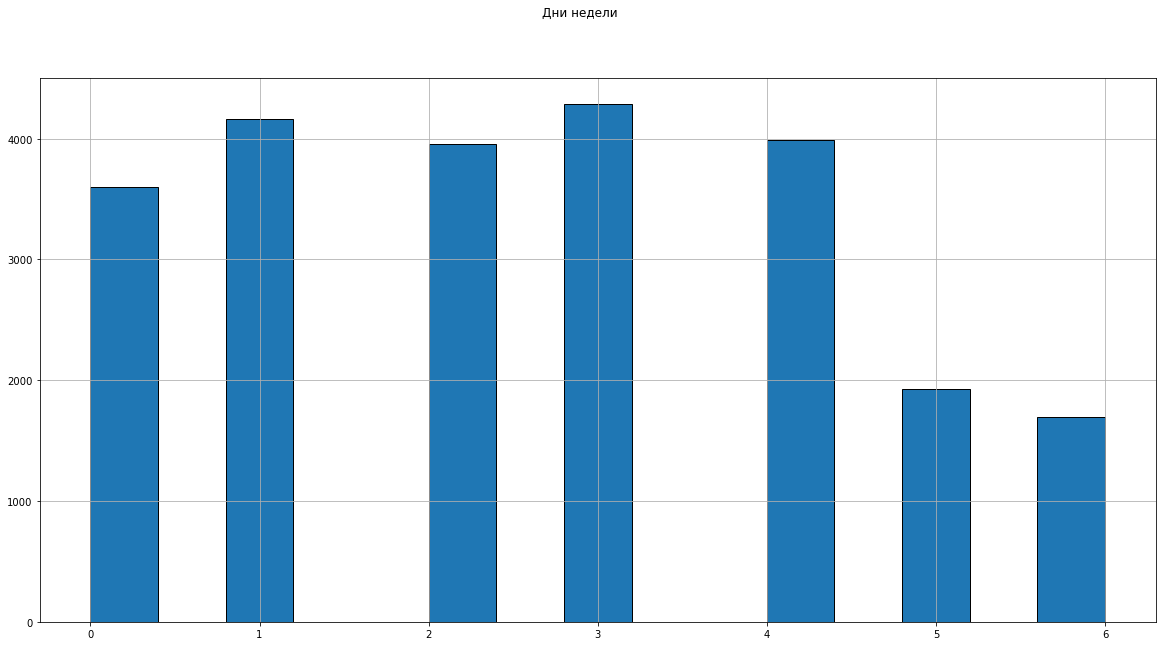

In [104]:
real_estate['weekday'].hist(bins=15, range=(0, 6), ec='black')

plt.suptitle('Дни недели')
plt.show()

In [105]:
real_estate['weekday'].mode()

0    3
Name: weekday, dtype: int64

<a id='p4s1.14'></a>
**4.1.14 month**

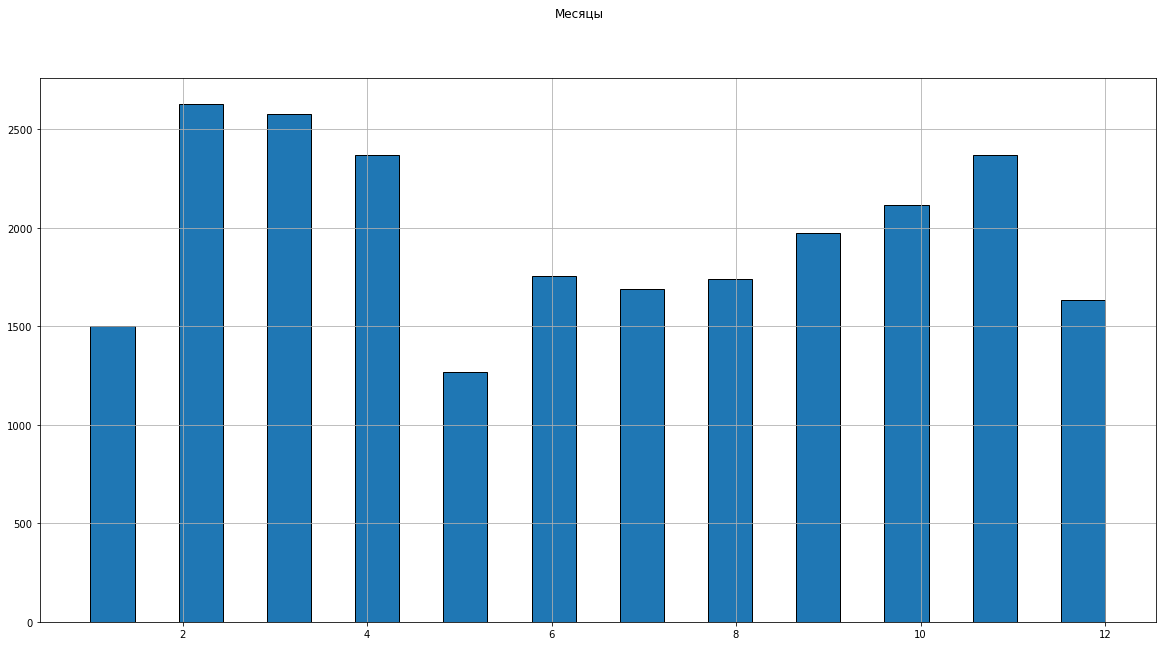

In [106]:
real_estate['month'].hist(bins=23, range=(1, 12), ec='black')
plt.suptitle('Месяцы')
plt.show()

**Вывод:**   
Практически все данны имеют Пуассоновское распределение, что видно из построенных гистограмм.

<a id='p4s2'></a>
**4.2 Время продажи квартиры**     
Построим гистограмму по `['days_exposition']` и выведем среднее и медиану

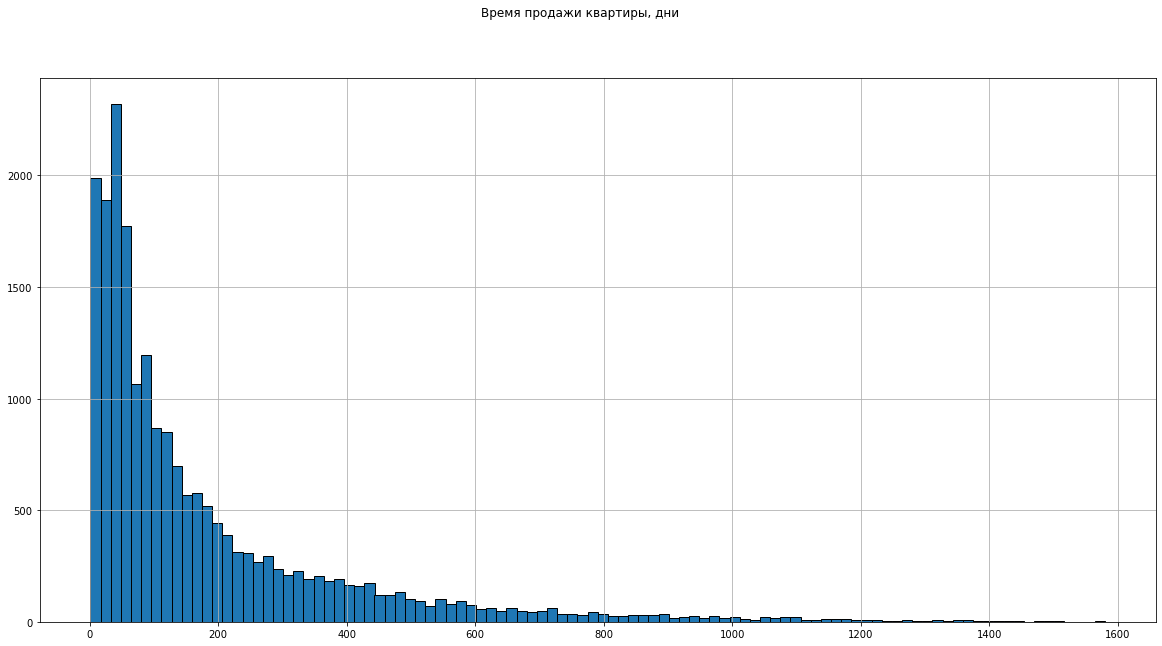

In [107]:
real_estate['days_exposition'].hist(bins = 100, ec='black')
plt.suptitle('Время продажи квартиры, дни')
plt.show()

**На графике видны выбросы. В какие-то дни квартиры продаются чаще. Рассмотрим поближе этот промежуток.** 

<AxesSubplot:>

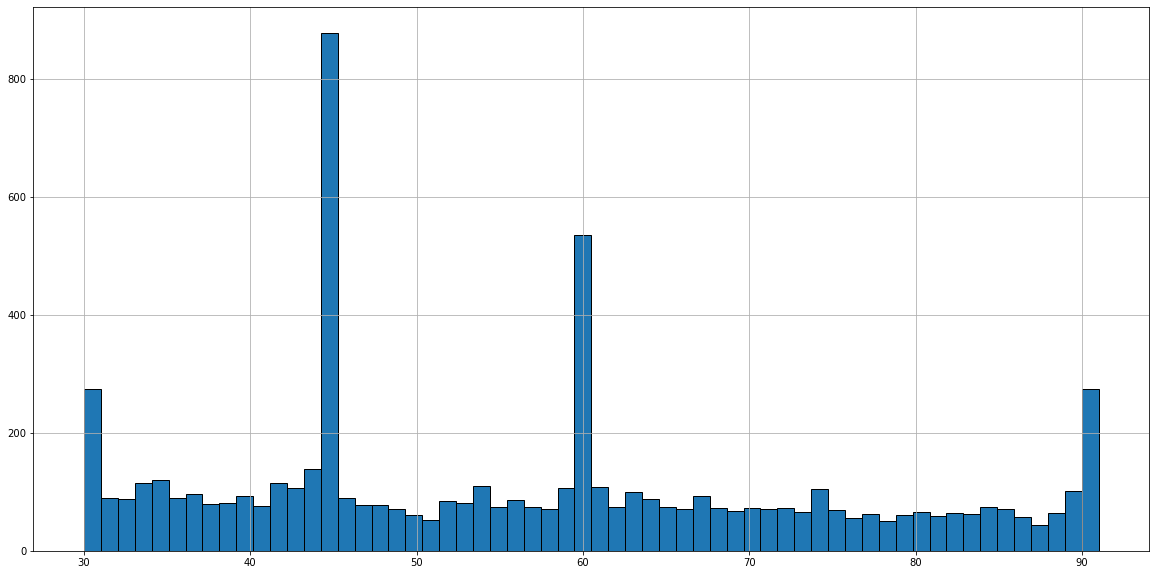

In [108]:
real_estate['days_exposition'].hist(bins = 60, range=(30, 91), ec='black')

**Видим, что на 30, 45, 60 и 90 день квартиры продаются чаще, чем в другие дни. Видимо это как-то связано с бизнесс процессами системы.**

In [109]:
real_estate['days_exposition'].describe().round()

count    20444.0
mean       181.0
std        220.0
min          1.0
25%         45.0
50%         95.0
75%        232.0
max       1580.0
Name: days_exposition, dtype: float64

(-50.0, 800.0)

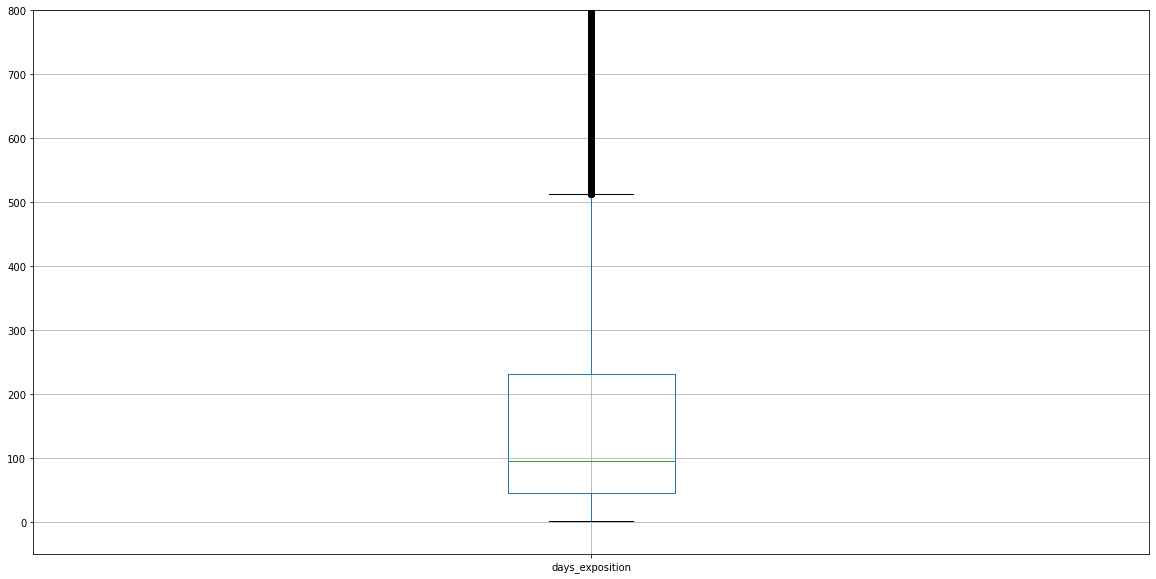

In [110]:
real_estate.boxplot('days_exposition') 
plt.ylim(-50, 800)

**Вывод:**  
Данные о времени продажи также имеют пуассоновское распределение. Среднее значение продажи – 180 дней, медианное – 95. Построив боксплот можем видеть, что 50% всех значений, сосредоточенных между 75 и 25 процентилем находятся между 45 и 232 днями. Продажи до 45 дней можно считать быстрыми, а дольше 232 – долгими. За пределами верхнего хвоста находятся значения выше 500 дней. Эти значения можно отнести скроее к аномально долгим срокам продаж. 

<a id='p4s3'></a>
**4.3 Факторы, влияющие на стоимость объекта**

<AxesSubplot:>

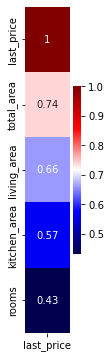

In [111]:
correlation_matrix = real_estate[['last_price',\
           'total_area',\
           'living_area',\
           'kitchen_area',\
           'rooms']].corr()
plt.figure(figsize=(1,6))
sns.heatmap(correlation_matrix[['last_price']].sort_values(by='last_price', ascending=False), cmap='seismic', 
            annot=True)


**Вывод:**  
Судя по построенному хитмэпу и коэффициентам корреляции наибольшим влиянием на стоимость объекта `['last_price']` является общая площадь этого объекта `['total_area']`, площадь кухни `['kitchen_area']` и жилая площадь `['living_area']`. Дата размещения объявления практически никак не влияет на стоимость объекта. 

In [112]:
def cat_corr(ind):
    floor_corr = real_estate.pivot_table(index=ind,values='last_price',aggfunc=['mean','median'])
    floor_corr.columns = ['Среднее','Медиана']
    floor_corr.plot(style='o-', grid=True)
    plt.xticks(fontsize=14)

<a id='cat_corr'></a>
**Зависимость цены недвижимости от категории этажей**

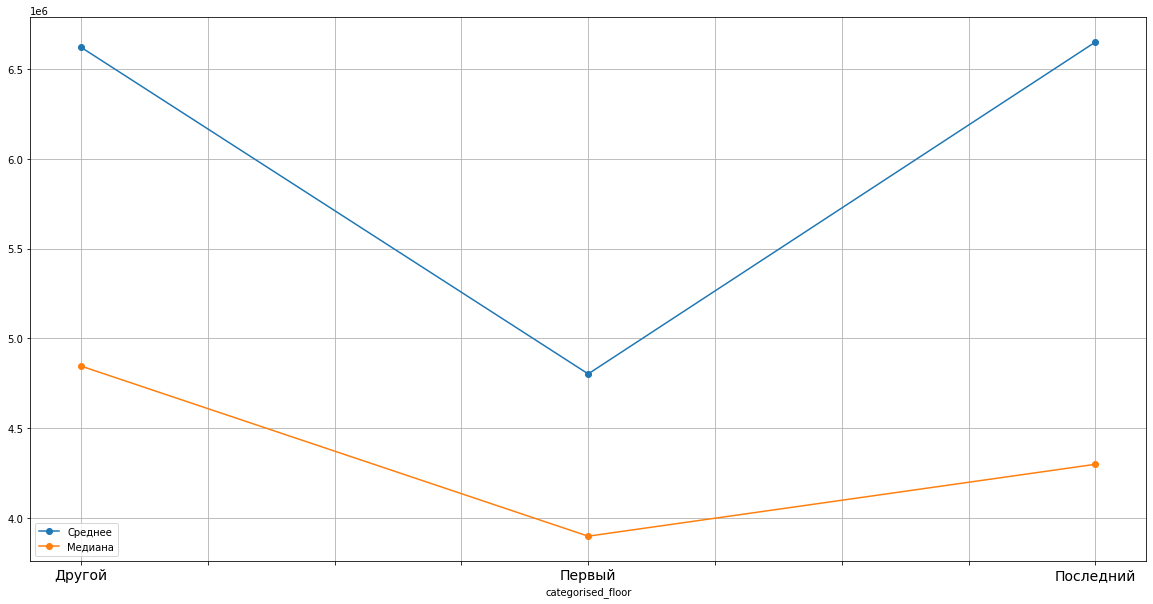

In [113]:
cat_corr('categorised_floor')

**Вывод:**    
Медиана и среднее по ценам на квартиры на первом этаже ниже чем на последнем, а на последнем ниже, чем на любом, кроме первого. Зависимость есть. 

<a id='weekday_corr'></a>
**Зависимость цены недвижимости от дня размещения обьявления**

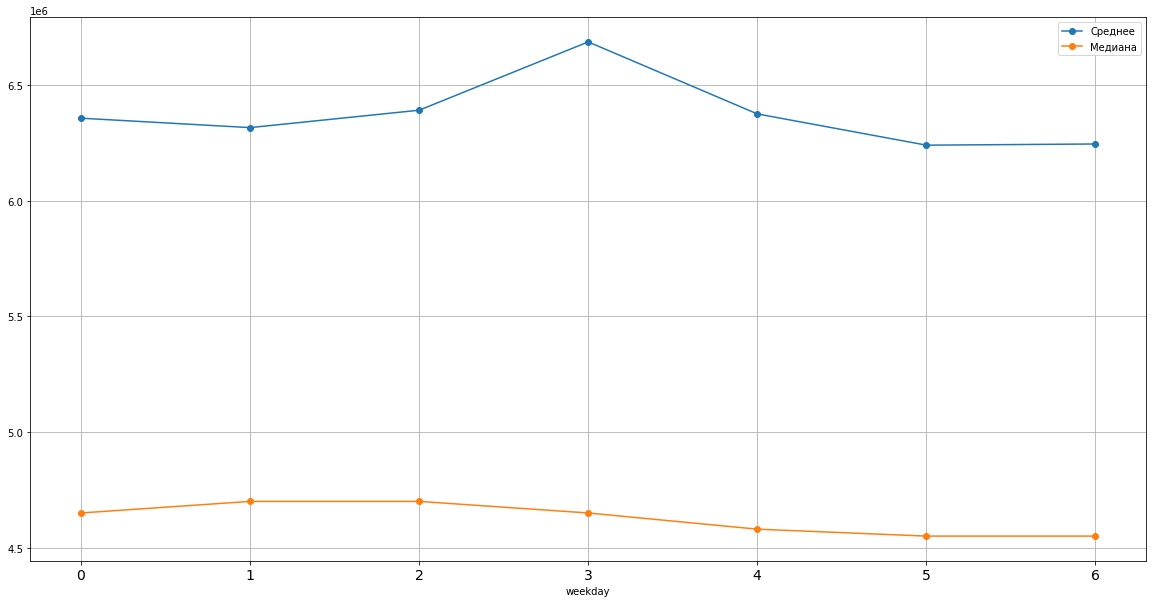

In [114]:
cat_corr('weekday')

**Вывод:**    
По медиане нет заметных отличий в цене, а по среднему значению в четверг квартиры выставлялись дороже, чем в остальные дни

<a id='month_corr'></a>
**Зависимость цены недвижимости от месяца размещения обьявления**

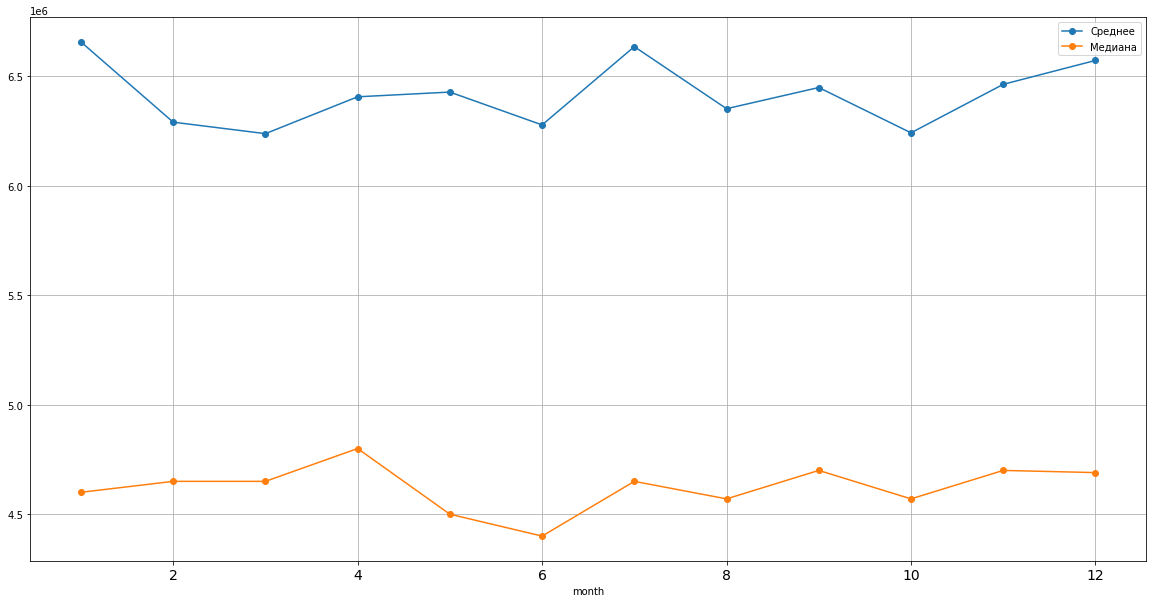

In [115]:
cat_corr('month')

**Вывод:**    
Нет значимой корреляции

<a id='year_corr'></a>
**Зависимость цены недвижимости от года размещения обьявления**

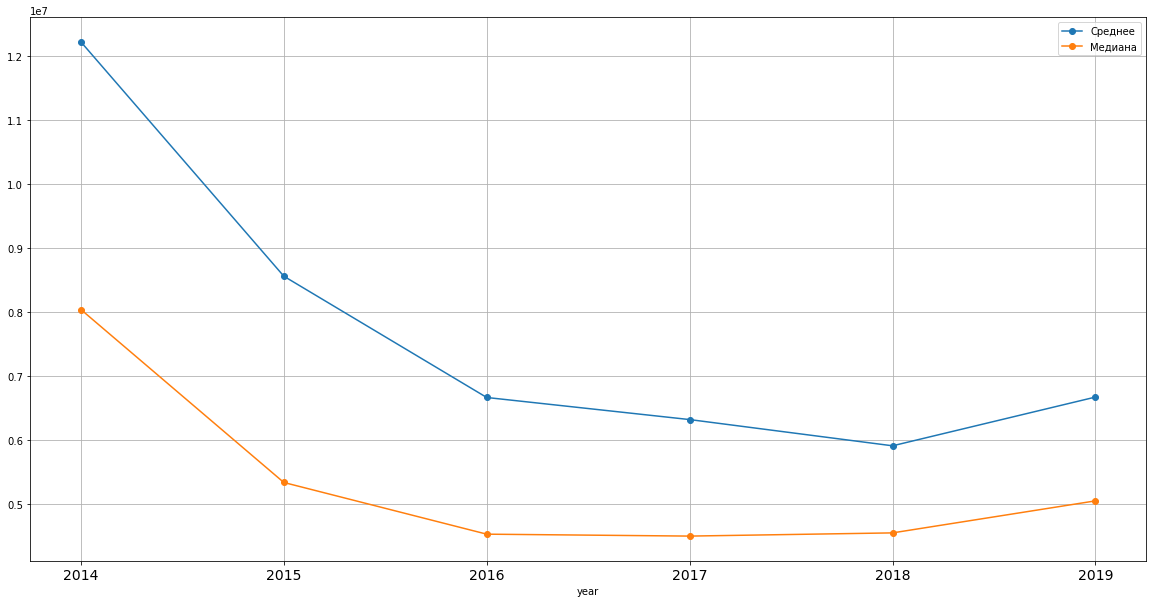

In [116]:
cat_corr('year')

**Вывод:**  
С 2014 до 2018 года недвижимость заметно дешевела. Зависимость отчетливо видна.

<a id='p4s4'></a>
**4.4 Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

In [117]:
pivot_estate = real_estate.pivot_table(index='locality_name', values='sq_meter_price', aggfunc=['count', 'mean']).reset_index()
pivot_estate.columns = ['Название населенного пункта', 'Количество объявлений', 'Средняя цена за кв. м.'] 
pivot_estate = pivot_estate.sort_values('Количество объявлений', ascending=False).head(10)
pivot_estate.sort_values('Средняя цена за кв. м.', ascending=False)

,Название населенного пункта,Количество объявлений,Средняя цена за кв. м.
33,Санкт-Петербург,15660,114295.779183
32,Пушкин,369,103125.373984
93,деревня Кудрово,299,92473.086957
296,посёлок Парголово,326,90134.650307
291,посёлок Мурино,520,85667.473077
326,посёлок Шушары,439,78672.835991
13,Колпино,337,75480.118694
6,Гатчина,305,68675.304918
3,Всеволожск,395,68541.184810
4,Выборг,237,58141.489451


**Вывод:**  
Самые высокие цены за квадратный метр жилья в Санкт-Петербурге, а самые низкие в Выборге.

<a id='p4s5'></a>
**4.5 Вычислить среднюю цену киллометра до центра Санкт-Петербурга**

In [118]:
spb_estatement = real_estate.query('locality_name == "Санкт-Петербург"')
spb_estatement['to_center_km'].value_counts()

12.0    1510
14.0    1506
11.0    1412
13.0    1398
15.0    1367
16.0    1103
10.0     910
4.0      903
5.0      765
9.0      687
8.0      667
17.0     534
3.0      522
6.0      469
7.0      403
2.0      305
1.0      236
21.0     194
18.0     174
22.0     139
0.0       86
20.0      82
19.0      82
25.0      75
23.0      30
24.0      22
28.0      10
26.0       3
29.0       3
27.0       2
Name: to_center_km, dtype: int64

**Видно, что объявлений дальше 24 км от центра когора уже мало и расчеты на основе 2-3 наблюдений будут неточными. Отбросим все наблюдения дальше 24 км от центра и будем работать с отставшимися.**

In [119]:
spb_estatement = spb_estatement.query('to_center_km < 24')
spb_estatement['to_center_km'].value_counts()

12.0    1510
14.0    1506
11.0    1412
13.0    1398
15.0    1367
16.0    1103
10.0     910
4.0      903
5.0      765
9.0      687
8.0      667
17.0     534
3.0      522
6.0      469
7.0      403
2.0      305
1.0      236
21.0     194
18.0     174
22.0     139
0.0       86
20.0      82
19.0      82
23.0      30
Name: to_center_km, dtype: int64

,to_center_km,last_price,sq_meter_price
0,0.0,23442315.0,187324.0
1,1.0,16362144.0,154175.0
2,2.0,14859601.0,143960.0
3,3.0,11969392.0,126053.0
4,4.0,13527405.0,137613.0
5,5.0,14365892.0,145550.0
6,6.0,13897399.0,150774.0
7,7.0,11773457.0,140877.0
8,8.0,8441578.0,119773.0
9,9.0,6428071.0,109997.0


<AxesSubplot:>

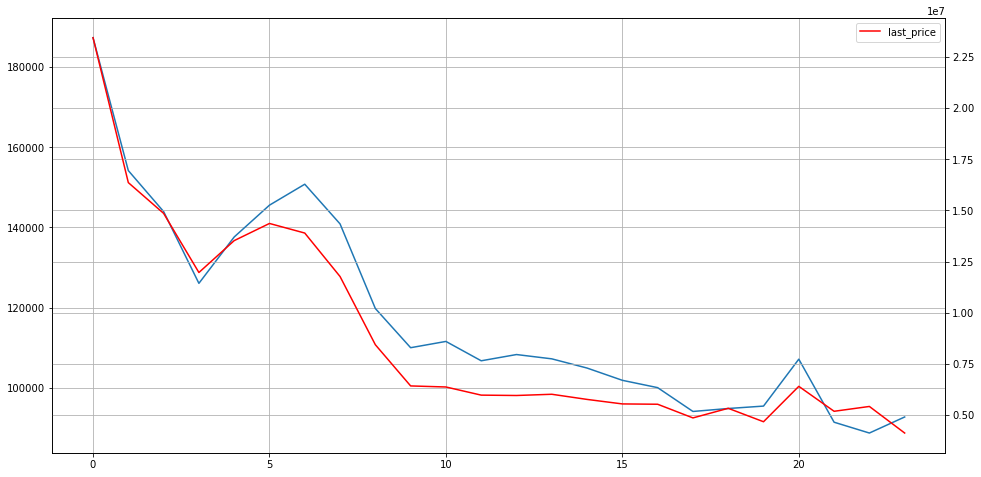

In [120]:
center_spb_price = spb_estatement.groupby('to_center_km', as_index=False).agg({'last_price':'mean', 'sq_meter_price':'mean'}).round()
display(center_spb_price)
sq_meter_plot = center_spb_price['sq_meter_price'].plot(grid=True, figsize=(16, 6))
display(center_spb_price[['last_price']].plot(grid=True, figsize=(16, 8), ax = sq_meter_plot.twinx(), color='red'))

**Вывод:**    
По мере приближения к центру цена и квадратного метра и жилья в целом возрастают. Это вполне объяснимо – наверняка корреляция стоимости жилья и квадратного метра очень высока. Так же можем заметить, что на промежутке от 10 км от центра до центра Санкт-Петербурга график растет особенно резко. К сравнению на промежутке от 10 до 24 км удаленности от центра такого резкого роста не наблюдается. 

<a id='p5'></a>
### Общий вывод

**Факторами, которые наиболее сильно влияют на цену недвижимости являются ее плошадь, категория этажа и год, в котором приобреталась/продавалась недвижимость.** 
              

**Мы проверили влияние удаленности от центра на стоимость общей площади и квадратного метра жилья для Санкт-Петербурга в радиусе 24 км и получили следующую информацию: цены плавно возрастают на промежутке от 10 до 24 км и находятся в диапазоне от 92 тыс до 111 тыс за квадратный метр. Далее рост становится более резким и в радиусе 10 км цена за кв. метр жилья варьируется от 111 до 185 тыс. за кв. метр жилья. Отсюда следует, что квартиры в центре Питера (в радиусе 10 км) значительно дороже.**

**Среднее время продажи недвижимости находится в промежутке от 45 до 232 дней – в этот временной промежуток  удается продать 50% объектов. Все, что выше или ниже этих временных пределов можно считать уже долгими или быстрыми сделками.**

**Самая дорогая недвижимость находится в Питере – цена за кважратный метр жилья там самая выскокая – около 190 тыс. за кв. метр. Но стоит учитывать отдаленность от центра города, т.к. в радиусе 10 км цена за квадратный метр возрастает особенно резко по мере приближения к центру, а за пределами 10 км цены уже заметно ниже.**